In [14]:
!sudo apt-get install -y texlive-latex-extra texlive-fonts-recommended cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [15]:
import os
import numpy as np
from glob import glob
from scipy import optimize
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

In [16]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"]
})

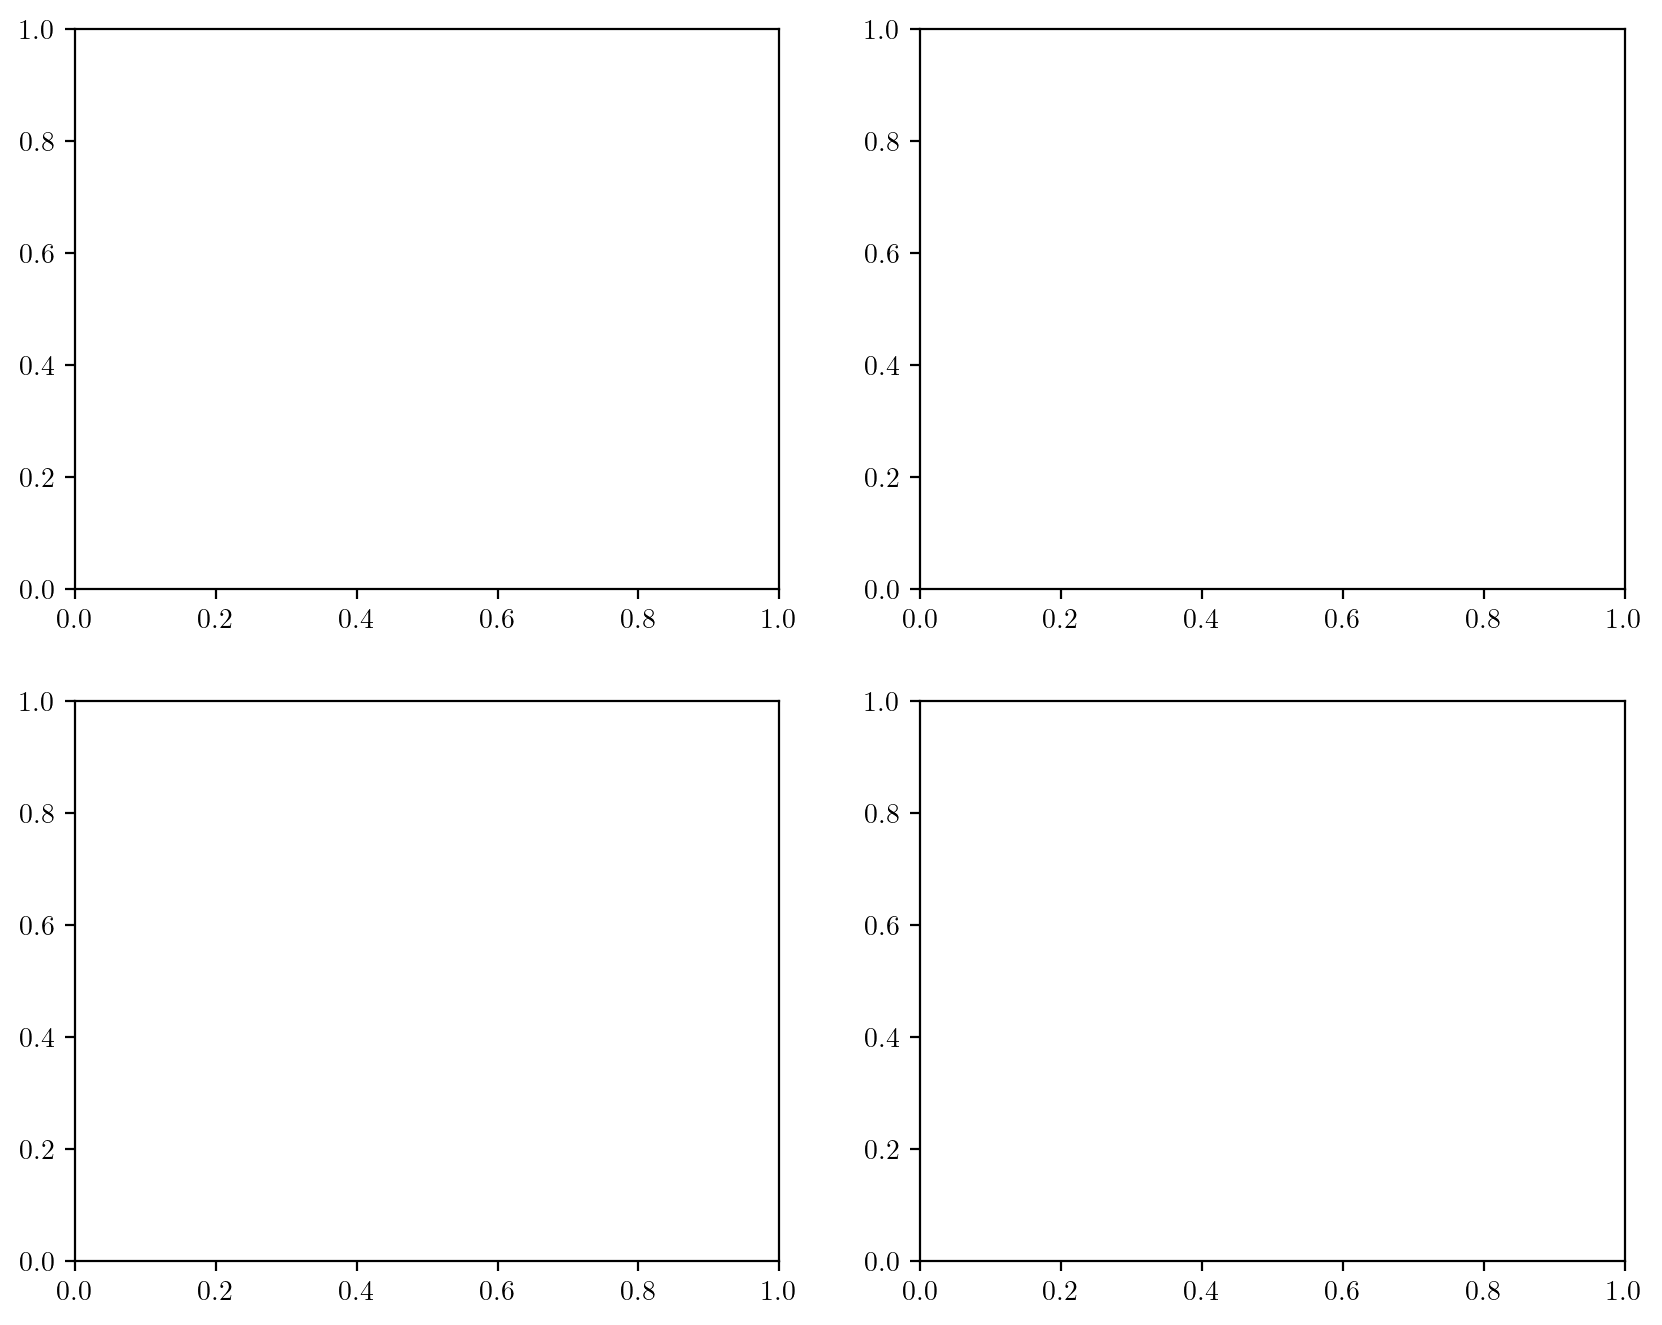

In [17]:
# Graph paramters
font_size = 26
colour = 'navy'
shade = 'navy'
fit_colour = 'black'

# Compiling all the graphs into one subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=200)

# Access individual axes
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

# Spectrum


In [18]:
# Spectrum
uploaded = files.upload()
data_file_path_spectrum = list(uploaded.keys())[0]
print(data_file_path_spectrum)

Saving f3-710-26.03.2025-10.39-B-StepAndGlue5.3mW10sExpTime.csv to f3-710-26.03.2025-10.39-B-StepAndGlue5.3mW10sExpTime (1).csv
f3-710-26.03.2025-10.39-B-StepAndGlue5.3mW10sExpTime (1).csv


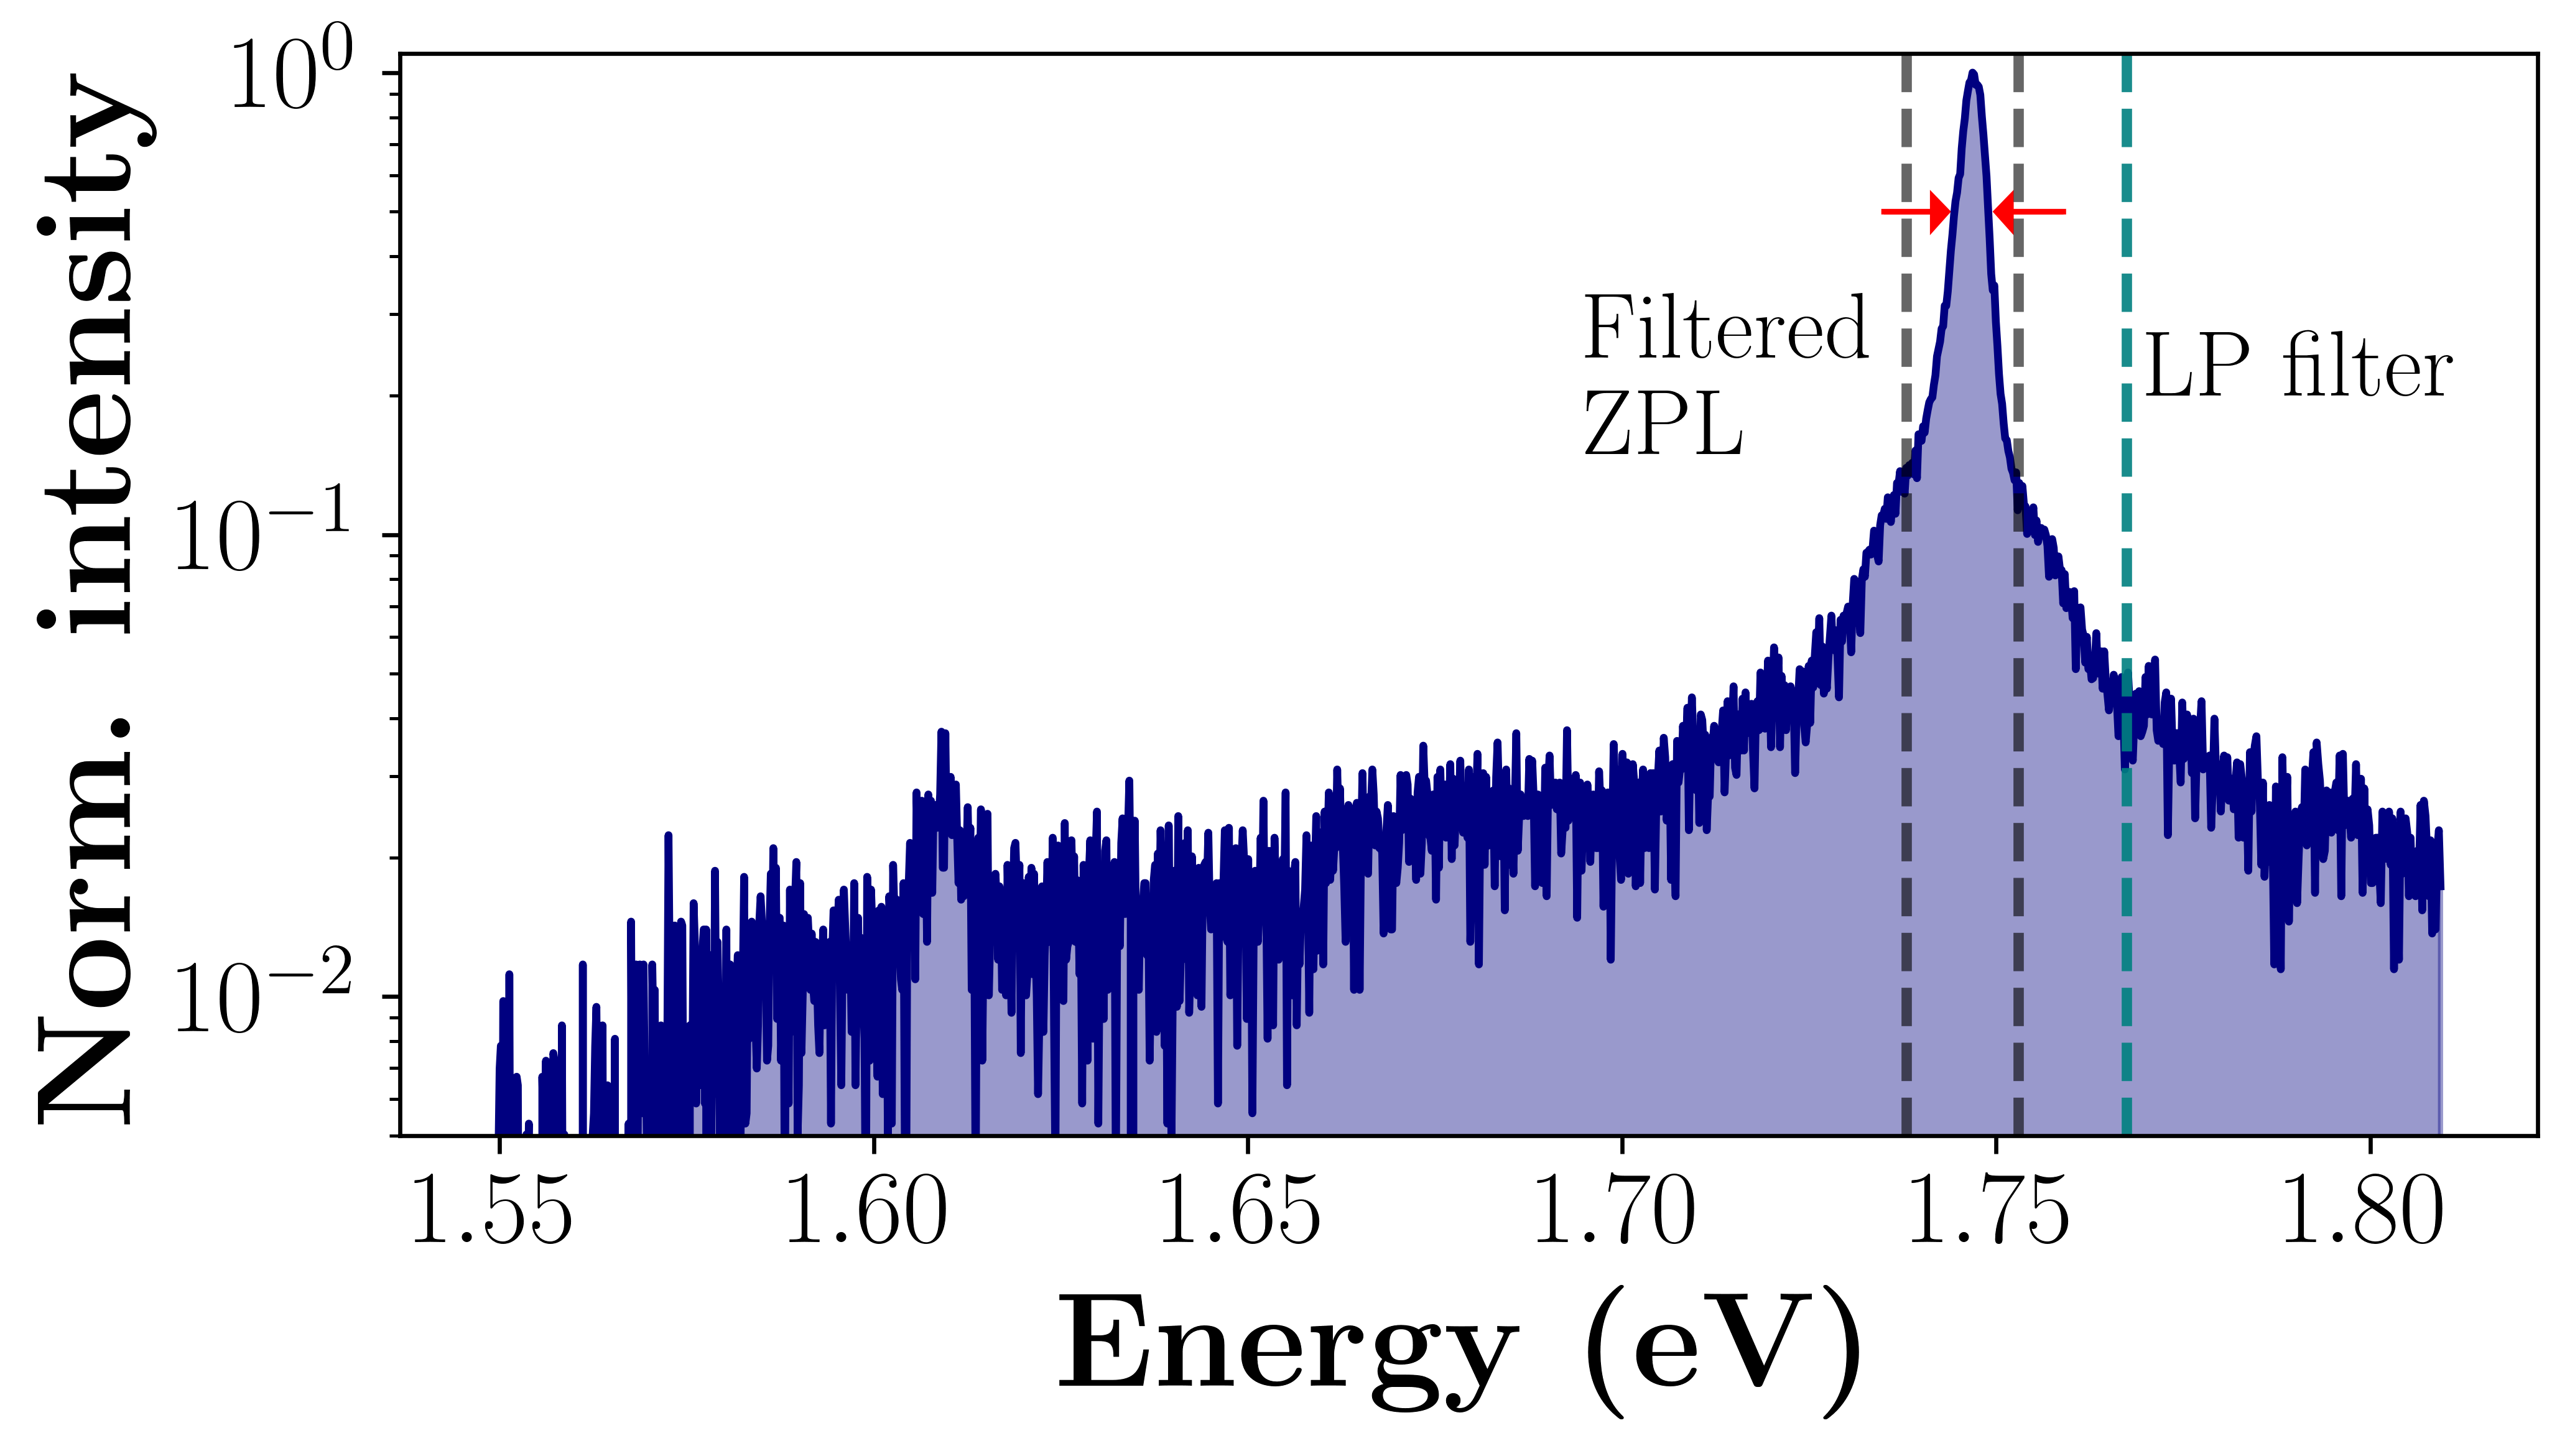

In [19]:
XYint = np.loadtxt(data_file_path_spectrum, delimiter=',',usecols=(0,1), skiprows=10)
plt.figure(figsize=(7,4), dpi = 600)
window = 1000

# To plot wavelength spectrum
# plt.plot(XYint[window:-300,0],(XYint[window:-300,1]-500)/max(XYint[window:,1]-500), colour)
# plt.xlabel(r'\textbf{Wavelength (nm)}', fontsize=26)
# plt.ylabel(r'\textbf{Intensity (a.u.)}', fontsize=26)
# plt.xticks(fontsize=20)  # Cambia el tamaño de los números en el eje x
# plt.yticks(fontsize=20)  # Cambia el tamaño de los números en el eje y
# plt.show()

#Intensity in eV
energy_nm = XYint[:,0]
energy_eV = 1239.8/energy_nm
x_values = energy_eV[window:]
y_values = (XYint[window:,1]-500)/max(XYint[window:,1]-500)

# To plot eV spectrum
plt.semilogy(x_values, y_values, color=colour)
plt.fill_between(x_values, y_values, color=shade, alpha=0.4)  # Alpha controls transparency
plt.axvline(x=1.7674, color='teal', linestyle='--', linewidth=2, alpha= 0.9)
plt.axvline(x=1.753, color='black', linestyle='--', linewidth=2, alpha= 0.6)
plt.axvline(x=1.738, color='black', linestyle='--', linewidth=2, alpha= 0.6)
plt.arrow(1.735, max(y_values)/2, 0.0085, 0, length_includes_head=True,
          head_width=0.08, head_length=0.002, color='red')
plt.arrow(1.759, max(y_values)/2, -0.009, 0, length_includes_head=True,
          head_width=0.08, head_length=0.002, color='red')
#plt.text(1.6, 0.8, r'FWHM' + r' = 1.2 THz', fontsize=font_size)
plt.text(1.695, 0.15, 'Filtered \n ZPL', fontsize=18)
plt.text(1.770, 0.2, 'LP filter', fontsize=18)
plt.xlabel(r'\textbf{Energy (eV)}', fontsize=26)
plt.ylabel(r'\textbf{Norm. intensity}', fontsize=26)
plt.ylim(0.005, 1.1)
plt.xticks(fontsize=20)  # Cambia el tamaño de los números en el eje x
plt.yticks(fontsize=20)  # Cambia el tamaño de los números en el eje y
plt.tight_layout()
plt.show()

# Lifetime

In [20]:
# Lifetime
uploaded = files.upload()
data_file_path_lifetime = list(uploaded.keys())[0]
print(data_file_path_lifetime)

Saving 25ns_1000bins.txt to 25ns_1000bins (1).txt
25ns_1000bins (1).txt


In [21]:
# Load in IRF File
upload = files.upload()
data_file_path_IRF = list(upload.keys())[0]

Saving Start_FastPhotodide_delay_5ns_trig_-116mV_CH1_MPDAPD1_trig_1.5V_delay_0ns_90kcts.txt to Start_FastPhotodide_delay_5ns_trig_-116mV_CH1_MPDAPD1_trig_1.5V_delay_0ns_90kcts (1).txt


/tmp/ipython-input-1106301861.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(final_lt_timestamp[round(max_index*1.1):], fit_norm, 'k-', label='Fit', color = fit_colour, alpha = 1, linewidth = 2.1)


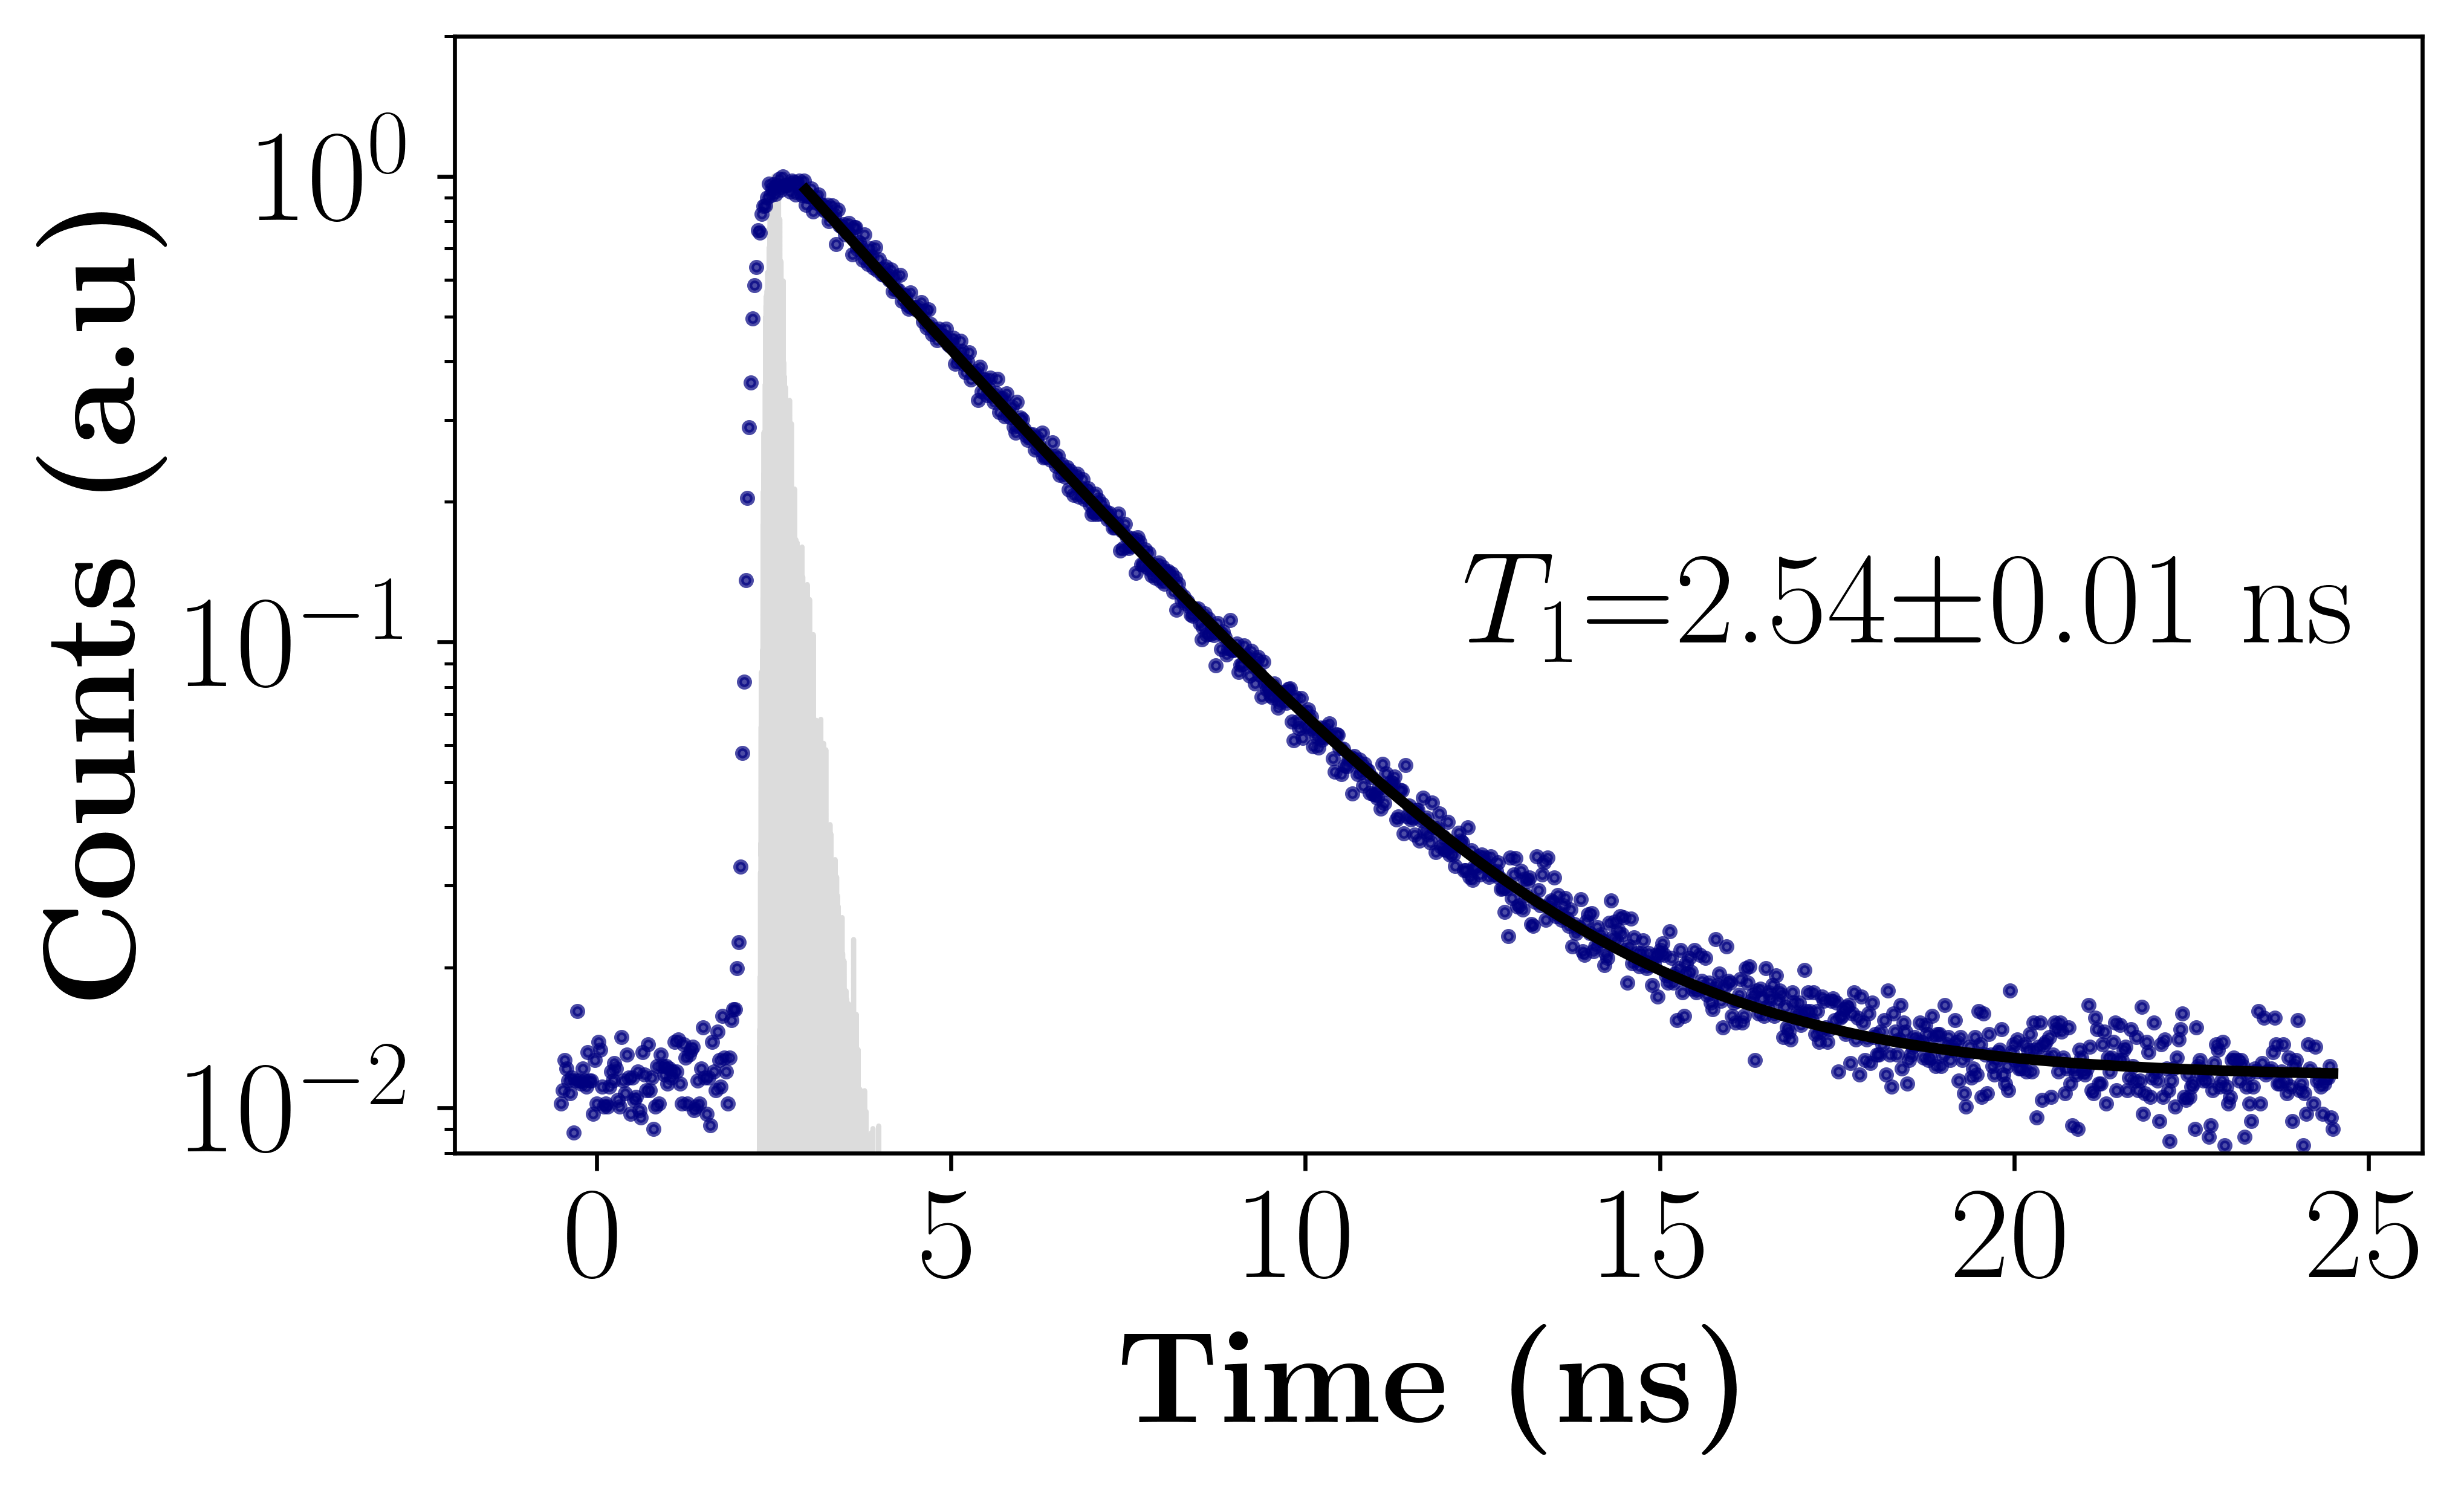

In [22]:
"""
Fit options
"""
def exponential(x, A, lt, x0, c):
    return A*np.exp(-((x-x0)/lt)) + c

def biexponential(x, A1, lt1, A2, lt2, x0, c):
    return A1*np.exp(-((x-x0)/lt1)) + A2*np.exp(-((x-x0)/lt2)) + c

# Load in data
timestamp, counts = np.loadtxt(data_file_path_lifetime, skiprows=19, delimiter=';', unpack=True)
IRF_timestamp, IRF_counts = np.loadtxt(data_file_path_IRF, skiprows=19, delimiter=';', unpack=True)

# Prepare data for fit
max_index = np.argmax(counts)
fit_counts = counts[round(max_index*1.01):]
fit_timestamp = timestamp[round(max_index*1.01):]
index, _ = min(enumerate(fit_counts), key=lambda x: abs(x[1]-max(counts)/1000))
fit_counts = fit_counts[:index]
fit_timestamp = fit_timestamp[:index]

# Create figure and axis
plt.figure(figsize=(7,4), dpi=600)
plt.xlabel(r"\textbf{Time (ns)}", fontsize=font_size)
plt.ylabel(r"\textbf{Counts (a.u)}", fontsize=font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.ylim(0.8*1e-2,2)

# Perform fit
popt, cov = optimize.curve_fit(exponential, fit_timestamp, fit_counts, p0=[max(counts), 0.1e-7, 0.01e-7, 1e-5], sigma = np.sqrt(fit_counts))
tau_error = np.sqrt(cov[1,1])*10**9

# Normalise Data
max_counts = max(counts)
counts = counts/max_counts
IRF_counts_norm = IRF_counts/max(IRF_counts)
fit_norm = exponential(timestamp[round(max_index*1.1):], *popt)/max_counts

# Plot data and fit
final_lt_timestamp = timestamp/1e-9
final_lt_counts = counts
final_lt_fit_norm = fit_norm
plt.semilogy(final_lt_timestamp, final_lt_counts, 'o',color=shade, ms = 2,alpha=0.7, label='Data')
plt.plot(final_lt_timestamp[round(max_index*1.1):], fit_norm, 'k-', label='Fit', color = fit_colour, alpha = 1, linewidth = 2.1)
plt.text(0.5*max(final_lt_timestamp), 0.1*max(final_lt_counts), r'$T_1$' + f'={round(popt[1]*10**9,2)}' + r'$\pm$' +  f'{tau_error:.2f} ns', fontsize=font_size)

# Plot IRF
plt.fill_between((IRF_timestamp-0.24e-9)/1e-9, IRF_counts_norm, color="gainsboro", alpha=1)  # Alpha controls transparency

plt.show()

#G2 Definitive edition

In [ ]:
uploaded = files.upload()
data_file_path_g2_0_2mW = list(uploaded.keys())[0]
print(data_file_path_g2_0_2mW)

KeyboardInterrupt: 

In [ ]:
def bi_exp (x,A, B, to, t1):
    return 1+A*np.exp(-np.abs(x/t1))+B*np.exp(-np.abs(x/to))

def one_exp (x,A, t1):
    return 1+A*np.exp(-np.abs(x/t1))

def one_exp_unnormalized (x,A, t1, B):
    return B+A*np.exp(-np.abs((x)/t1))

def one_exp_delayed (x,A, xo, t1):
    return 1+A*np.exp(-np.abs((x-xo)/t1))

def one_exp_delayed_unnormalized (x,A, xo, t1, B):
    return B+A*np.exp(-np.abs((x-xo)/t1))

In [ ]:
DATA = np.loadtxt(data_file_path_g2_0_2mW, delimiter='\t',skiprows=4)
df = pd.DataFrame(DATA, columns=["Delay", "Correlated events"])
print(df.head())


In [ ]:

fraction_long_delay = 1/4
int_for_long_delays = np.concatenate((np.array(df.iloc[:int(len(df.iloc[:,0])*fraction_long_delay),1]), np.array(df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)):,1])))

norm = np.average(int_for_long_delays)
print(norm)
delays = df.iloc[:,0]
correlations = df.iloc[:,1]


parametros_optimos, covarianza = optimize.curve_fit(one_exp_delayed_unnormalized, delays, correlations, p0=[1, 10, 2000, 45]) #A, x0, t1, B



"""
Plot
"""
font = "serif"
font_size = 20
plt.figure(figsize=(10,5))
plt.plot(delays,one_exp_delayed_unnormalized(delays, parametros_optimos[0], parametros_optimos[1],parametros_optimos[2],parametros_optimos[3]), '-r')
plt.plot(delays, correlations, 'ok', ms=2)
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*fraction_long_delay),0], color='r', linestyle='--')
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)),0], color='r', linestyle='--')
plt.xlabel(df.columns[0] + " (ps)", fontsize=font_size, fontfamily=font)
plt.ylabel(df.columns[1]+ " (a.u)", fontsize=font_size, fontfamily=font)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

print(parametros_optimos)

norm = parametros_optimos[3]
A = parametros_optimos[0]
g2_0 = (norm+parametros_optimos[0])/norm
t1 = abs(parametros_optimos[2])
zero_time_delay = abs(parametros_optimos[1])

print("g2(0) = " + str(g2_0))
print("zero time delay = " + str(zero_time_delay))
print("t1 = " + str(t1) + " ps")
print("Norm = " + str(norm))

First we calculate the error on $g_2(0)$ based on the errors povided by the exponential fit. If my fit function is:

$$f(x) = B+A\cdot e^{-\left|\frac{x-x_0}{\tau_1}\right|}$$

Then,
$$g_2(0) = \frac{B+A}{B}$$
And therefore
$$\Delta g_2(0) = \sqrt{\left(\frac{\partial g_2(0)}{\partial A}\cdot \Delta A\right)^2 + \left(\frac{\partial g_2(0)}{\partial B}\cdot \Delta B\right)^2 + 2\frac{\partial g_2(0)}{\partial B}\frac{\partial g_2(0)}{\partial A}COV(AB)}$$

In [ ]:
B = parametros_optimos[3]
A = parametros_optimos[0]
g2_0 = (B+A)/B
t1 = abs(parametros_optimos[2])
zero_time_delay = abs(parametros_optimos[1])


Delta_A = np.sqrt(covarianza[0,0])
Delta_B = np.sqrt(covarianza[3,3])
Delta_AB = covarianza[0,3]

Delta_g2_0 = np.sqrt((Delta_A/B)**2+(Delta_B*A/B**2)**2-2*Delta_AB*A/B**3)
#print(Delta_g2_0)

text = "g2(0) = " + str(g2_0) + """ +- """ + str(Delta_g2_0)
print(text)


In [ ]:
print(covarianza)

Now, let's compute the error from the raw data

In [ ]:
fraction_long_delay = 1/5
int_for_long_delays = np.concatenate((np.array(df.iloc[:int(len(df.iloc[:,0])*fraction_long_delay),1]), np.array(df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)):,1])))

norm = np.average(int_for_long_delays)
print(norm)
delays = df.iloc[:,0]
correlations = df.iloc[:,1]


parametros_optimos, covarianza = optimize.curve_fit(one_exp_delayed_unnormalized, delays, correlations, p0=[1, 10, 2000, 45]) #A, x0, t1, B



"""
Plot
"""
font = "serif"
font_size = 20
plt.figure(figsize=(10,5))
plt.plot(delays,one_exp_delayed_unnormalized(delays, parametros_optimos[0], parametros_optimos[1],parametros_optimos[2],parametros_optimos[3]), '-r')
plt.plot(delays, correlations, 'ok', ms=2)
plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*fraction_long_delay),0], color='r', linestyle='--')
plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)),0], color='r', linestyle='--')
plt.xlabel(df.columns[0] + " (ps)", fontsize=font_size, fontfamily=font)
plt.ylabel(df.columns[1]+ " (a.u)", fontsize=font_size, fontfamily=font)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

print(parametros_optimos)

norm = parametros_optimos[3]
A = parametros_optimos[0]
g2_0 = (norm+parametros_optimos[0])/norm
t1 = abs(parametros_optimos[2])
zero_time_delay = abs(parametros_optimos[1])

print("g2(0) = " + str(g2_0))
print("zero time delay = " + str(zero_time_delay))
print("t1 = " + str(t1) + " ps")
print("Norm = " + str(norm))


In [ ]:
# prompt: Necesito encontrar el índice del valor de delays más cercano a zero_time_delay

# Find the index of the delay value closest to zero_time_delay
index_min = np.argmin(np.abs(delays - zero_time_delay))
print(f"Index of delay closest to zero_time_delay: {index_min}")
print(f"Delay value at closest index: {delays[index_min]}")
print(f"Number of correlations for that index: {correlations[index_min]}")
y_0 =  correlations[index_min]


In this case, if $A$ is the number of correlations for zero time delay and $N$ is the normalization value, i.e. the average number of correlations for long delays:

$$g^{(2)}(0) = \frac{y_0}{N}$$

And again:

$$\Delta g^{(2)}(0) = \sqrt{\left(\frac{\partial g_2(0)}{\partial y_0}\cdot \Delta y_0\right)^2 + \left(\frac{\partial g_2(0)}{\partial N}\cdot \Delta N\right)^2}$$

The value of $A$ comes from a Poissonian random variable and hence $\Delta y_0 = \sqrt{y_0}$.

In [ ]:
N = np.average(int_for_long_delays)

Delta_N = np.std(int_for_long_delays)
Delta_y_0 = np.sqrt(y_0)

Delta_g2_0 = np.sqrt((Delta_y_0/N)**2+(Delta_N*y_0/N**2)**2)
g2_0 = y_0/N

text = "g2(0) = " + str(g2_0) + """ +- """ + str(Delta_g2_0)
print(text)

Now, I'm going to shift all data so that 0 delay is at 0

In [ ]:
delay_shifted = delays - zero_time_delay

"""
Plot
"""
font = "serif"
font_size = 20
plt.figure(figsize=(10,5))
#plt.plot(delays,one_exp_delayed_unnormalized(delays, parametros_optimos[0], parametros_optimos[1],parametros_optimos[2],parametros_optimos[3]), '-r')
plt.plot(delay_shifted, correlations, 'ok', ms=2)
#plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*fraction_long_delay),0], color='r', linestyle='--')
#plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)),0], color='r', linestyle='--')
plt.xlabel(df.columns[0] + " (ps)", fontsize=font_size, fontfamily=font)
plt.ylabel(df.columns[1]+ " (a.u)", fontsize=font_size, fontfamily=font)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

In [ ]:
parametros_optimos_shifted, covarianza_shifted = optimize.curve_fit(one_exp_unnormalized, delay_shifted, correlations, p0=[1, 2000, 45]) #A, x0, t1, B

"""
Plot
"""
font = "serif"
font_size = 20
plt.figure(figsize=(10,5))
plt.plot(delay_shifted,one_exp_unnormalized(delay_shifted, parametros_optimos_shifted[0], parametros_optimos_shifted[1],parametros_optimos_shifted[2]), '-r')
plt.plot(delay_shifted, correlations, 'ok', ms=2)
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*fraction_long_delay),0], color='r', linestyle='--')
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)),0], color='r', linestyle='--')
plt.xlabel(df.columns[0] + " (ps)", fontsize=font_size, fontfamily=font)
plt.ylabel(df.columns[1]+ " (a.u)", fontsize=font_size, fontfamily=font)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

print(parametros_optimos)

Norm_shift = parametros_optimos_shifted[2]
A_shift = parametros_optimos_shifted[0]
g2_0_shift = (norm+parametros_optimos_shifted[0])/norm
t1_shift = abs(parametros_optimos_shifted[1])


print("g2(0) = " + str(g2_0_shift))
print("t1 = " + str(t1_shift) + " ps")
print("Norm = " + str(Norm_shift))

In [ ]:
fraction_long_delay = 1/5
int_for_long_delays_shift = np.concatenate((np.array(correlations[:int(len(delay_shifted)*fraction_long_delay)]), np.array(correlations[int(len(delay_shifted)*(1-fraction_long_delay)):])))

norm_shift = np.average(int_for_long_delays_shift)
print(norm_shift)

In [ ]:
# prompt: necesito encontrar el valor de correlations cuyo indice coincide con el indice del valor mas cercano a 0 de delays_shifted

# Find the index of the delay_shifted value closest to zero
index_min_shifted = np.argmin(np.abs(delay_shifted))

# Get the correlation value at that index
correlation_at_min_shifted = correlations[index_min_shifted]

print(f"Correlation value at index of delay_shifted closest to zero: {correlation_at_min_shifted}")
y_0_shift = correlation_at_min_shifted

Para calcular el error:


$$\Delta g^{(2)}(0) = \sqrt{\left(\frac{\partial g_2(0)}{\partial y_0}\cdot \Delta y_0\right)^2 + \left(\frac{\partial g_2(0)}{\partial N}\cdot \Delta N\right)^2}$$

The value of $A$ comes from a Poissonian random variable and hence $\Delta y_0 = \sqrt{y_0}$.

In [ ]:
N = np.average(int_for_long_delays_shift)
Delta_N_shift = np.std(int_for_long_delays_shift)
Delta_y_0_shift = np.sqrt(y_0_shift)

Delta_g2_0_shift = np.sqrt((Delta_y_0_shift/N)**2+(Delta_N_shift*y_0_shift/N**2)**2)
g2_0_shift = y_0_shift/N

text = "g2(0) = " + str(g2_0_shift) + """ +- """ + str(Delta_g2_0_shift)
print(text)

We plot the fitted g2 with the corresponding error

In [ ]:
"""
Plot
"""
font = "serif"
font_size = 20
plt.figure(figsize=(10,5))
plt.plot(delay_shifted,one_exp_unnormalized(delay_shifted, parametros_optimos_shifted[0], parametros_optimos_shifted[1],parametros_optimos_shifted[2]), '-r')
plt.plot(delay_shifted, correlations, 'ok', ms=2)
plt.text(-40000, 40, r'$g^{2}(0) = $' + f'{round(g2_0_shift,2)} $\pm$ {round(Delta_g2_0_shift,2)}')
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*fraction_long_delay),0], color='r', linestyle='--')
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)),0], color='r', linestyle='--')
plt.xlabel(df.columns[0] + " (ps)", fontsize=font_size, fontfamily=font)
plt.ylabel(df.columns[1]+ " (a.u)", fontsize=font_size, fontfamily=font)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

print(parametros_optimos)

Norm_shift = parametros_optimos_shifted[2]
A_shift = parametros_optimos_shifted[0]
g2_0_shift = (norm+parametros_optimos_shifted[0])/norm
t1_shift = abs(parametros_optimos_shifted[1])


print("g2(0) = " + str(g2_0_shift))
print("t1 = " + str(t1_shift) + " ps")
print("Norm = " + str(Norm_shift))

In [ ]:
# prompt: Quiero la misma grafica que está dibujada en la celda anterior pero cambiando la escala del eje x, de manera que en lugar de picosegundos esté en nanosegundos (es decir, donde dice 1000 debe decir 1)

# ... (Your existing code)

"""
Plot
"""
font_size = 26
plt.figure(figsize=(7,4), dpi = 200)
colour = "maroon"

print(parametros_optimos)

Norm_shift = parametros_optimos_shifted[2]
A_shift = parametros_optimos_shifted[0]
g2_0_shift = (norm+parametros_optimos_shifted[0])/norm
t1_shift = abs(parametros_optimos_shifted[1])


print("g2(0) = " + str(g2_0_shift))
print("t1 = " + str(t1_shift) + " ps")
print("Norm = " + str(Norm_shift))

# ... (Your existing code)
Norm_shift = parametros_optimos_shifted[2]
A_shift = parametros_optimos_shifted[0]
g2_0_shift = (norm+parametros_optimos_shifted[0])/Norm_shift
t1_shift = abs(parametros_optimos_shifted[1])

"""
Plot
"""
font_size = 26
plt.figure(figsize=(7,4), dpi = 200)
colour = "maroon"

plt.plot(delay_shifted,one_exp_unnormalized(delay_shifted, parametros_optimos_shifted[0], parametros_optimos_shifted[1],parametros_optimos_shifted[2])/Norm_shift, '-k')
plt.plot(delay_shifted, correlations/Norm_shift, 'o', c=colour, ms=2)
plt.text(-30000, 1.4, r'$g^{2}(0) $' + f'={round(g2_0_shift,2)} $\pm$ {round(Delta_g2_0_shift,2)}',fontsize=font_size)
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*fraction_long_delay),0], color='r', linestyle='--')
# plt.axvline(x=df.iloc[int(len(df.iloc[:,0])*(1-fraction_long_delay)),0], color='r', linestyle='--')
plt.xlabel(r'\textbf{Delay (ns)}', fontsize=font_size) # Changed label to ns
plt.ylabel(r'\textbf{Coincidences}' + '\n' + r'\textbf{(norm.)}', fontsize=font_size)
plt.ylim(0,1.6)
plt.xlim(-50000,50000)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)

#Change x-axis ticks to nanoseconds
plt.xticks(plt.xticks()[0], [round(x / 1000) for x in plt.xticks()[0]])

plt.show()


# Pulsed G2

In [23]:
# pulsed g2
uploaded = files.upload()
data_file_path_pulsed_g2 = list(uploaded.keys())[0]
print(data_file_path_pulsed_g2)

Saving Pulsed10percent__2Files_Integrated__correlation_binsize_100_bins_200000.txt to Pulsed10percent__2Files_Integrated__correlation_binsize_100_bins_200000 (1).txt
Pulsed10percent__2Files_Integrated__correlation_binsize_100_bins_200000 (1).txt


In [24]:
DATA = np.loadtxt(data_file_path_pulsed_g2, delimiter='\t',skiprows=4)
df = pd.DataFrame(DATA, columns=["Delay", "Correlated events"])
print(df.head())

delays = df.iloc[:,0]
correlations = df.iloc[:,1]

        Delay  Correlated events
0 -20000000.0               37.0
1 -19999900.0               36.0
2 -19999800.0               46.0
3 -19999700.0               46.0
4 -19999600.0               49.0


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-459974502.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.text(-20000, 3.9, r'$g^{2}(0) $' + f'={0.11} $\pm$ {0.01}',fontsize=font_size)


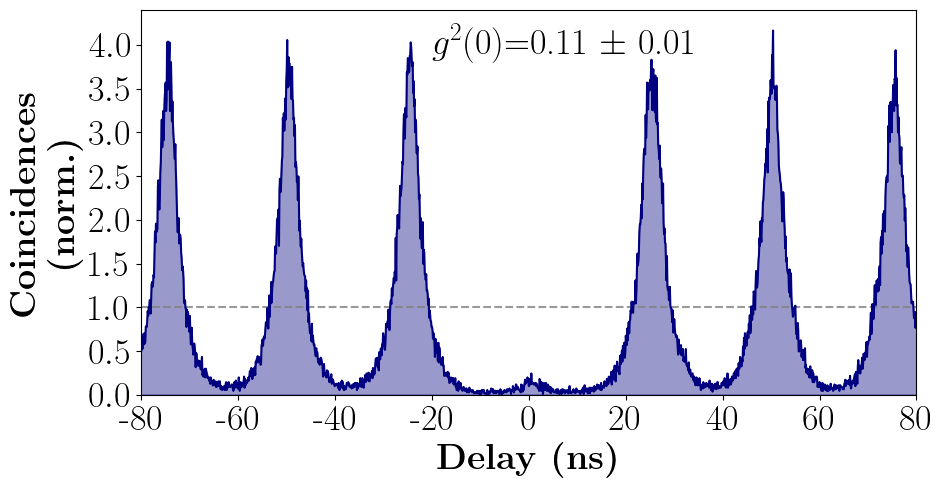

In [25]:
plt.figure(figsize=(10,5))
plt.axhline(1, linestyle='--', c = "grey", alpha = 0.8)
plt.plot(delays, correlations/111, '-', c=colour, ms=2)
plt.fill_between(delays, correlations/111, color=shade, alpha=0.4)  # Alpha controls transparency
plt.text(-20000, 3.9, r'$g^{2}(0) $' + f'={0.11} $\pm$ {0.01}',fontsize=font_size)
plt.xlabel(r'\textbf{Delay (ns)}', fontsize=font_size) # Changed label to ns
plt.ylabel(r'\textbf{Coincidences}' + '\n' + r'\textbf{(norm.)}', fontsize=font_size)
plt.ylim(0,4.4)
plt.xlim(-71000,71000)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)

#Change x-axis ticks to nanoseconds
plt.xticks(plt.xticks()[0], [round(x / 1000) for x in plt.xticks()[0]])

plt.show()

# Saturation Curve

In [26]:
# Saturation Curve
uploaded = files.upload()
data_file_path_saturation = list(uploaded.keys())[0]
print(data_file_path_saturation)

Saving RawDataSatCurve-Origin-2025-03-27-18-37-40.txt to RawDataSatCurve-Origin-2025-03-27-18-37-40.txt
RawDataSatCurve-Origin-2025-03-27-18-37-40.txt


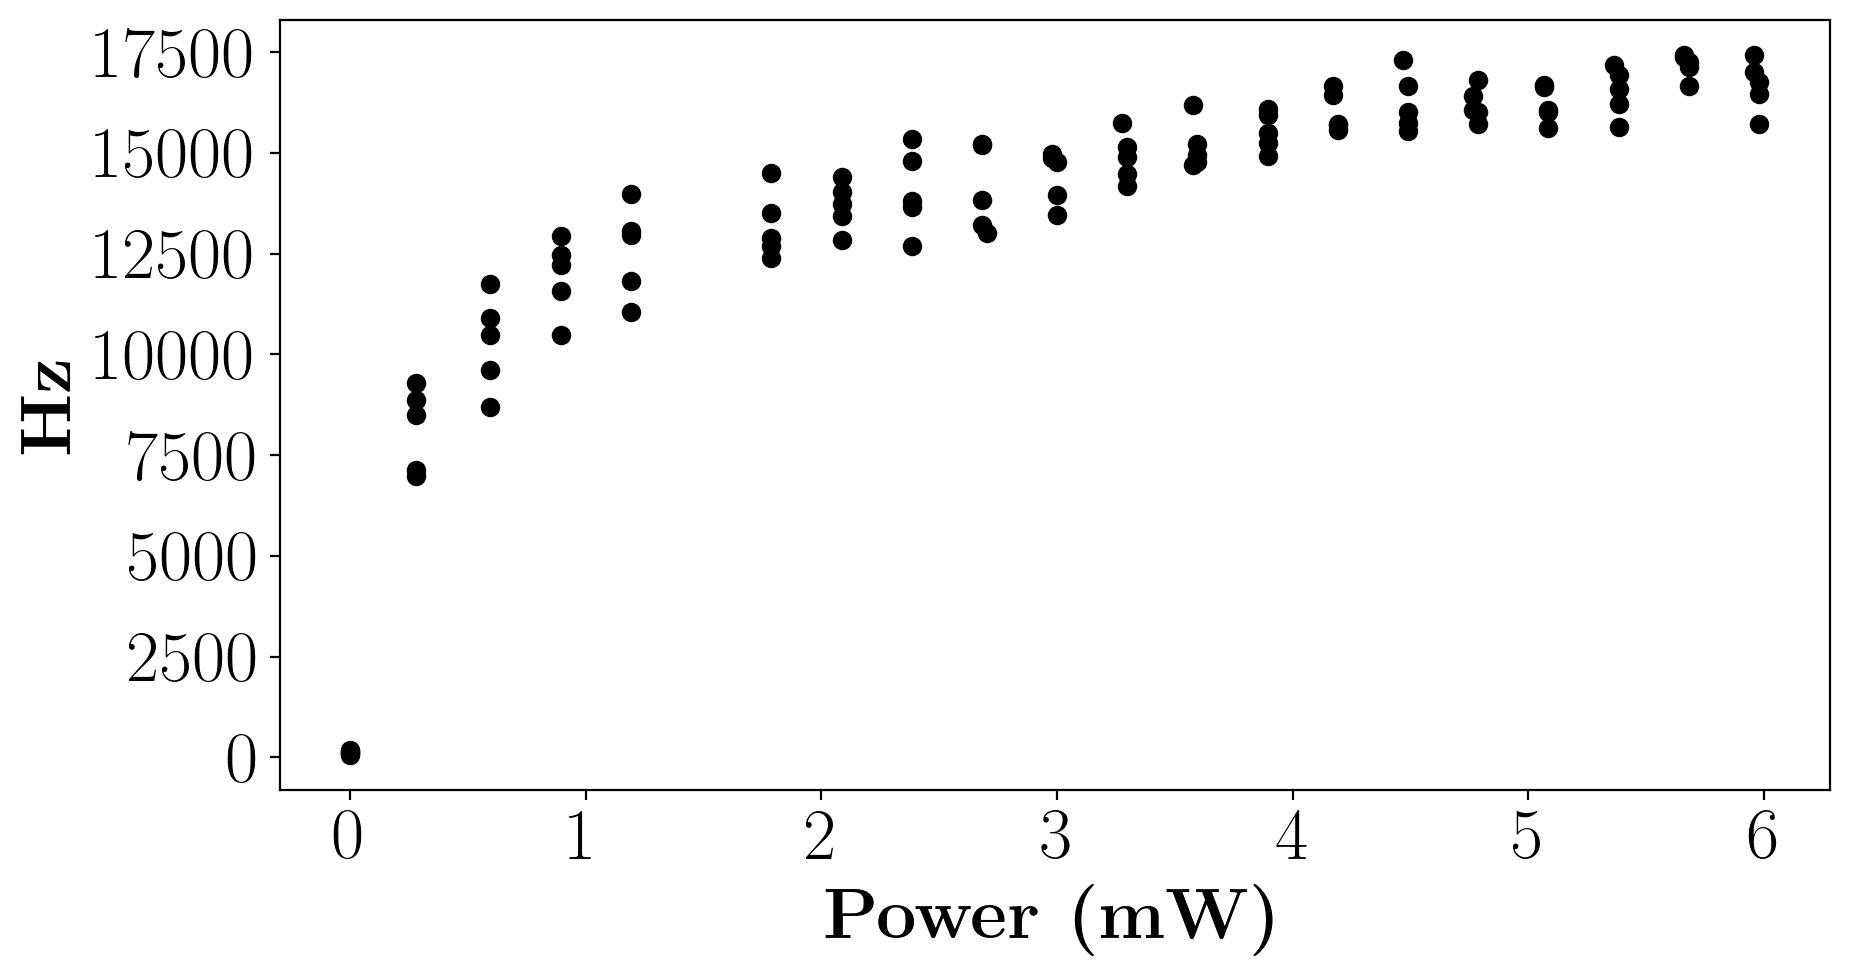

In [27]:
# Load in the data
power, counts = np.loadtxt(data_file_path_saturation, delimiter = ',', unpack = True)
counts *= 10

# Basic Plot
plt.figure(figsize=(10,5), dpi=200)
plt.plot(power, counts, 'o', color='black')
plt.xlabel(r"\textbf{Power (mW)}", fontsize=font_size)
plt.ylabel(r"\textbf{Hz}", fontsize=font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

/tmp/ipython-input-3905599084.py:19: RuntimeWarning: divide by zero encountered in divide
  return Imax / (1 + Psat / P)


0.5430705031921502
18057.735803192525
420.2637414696942
0.09224372436788585


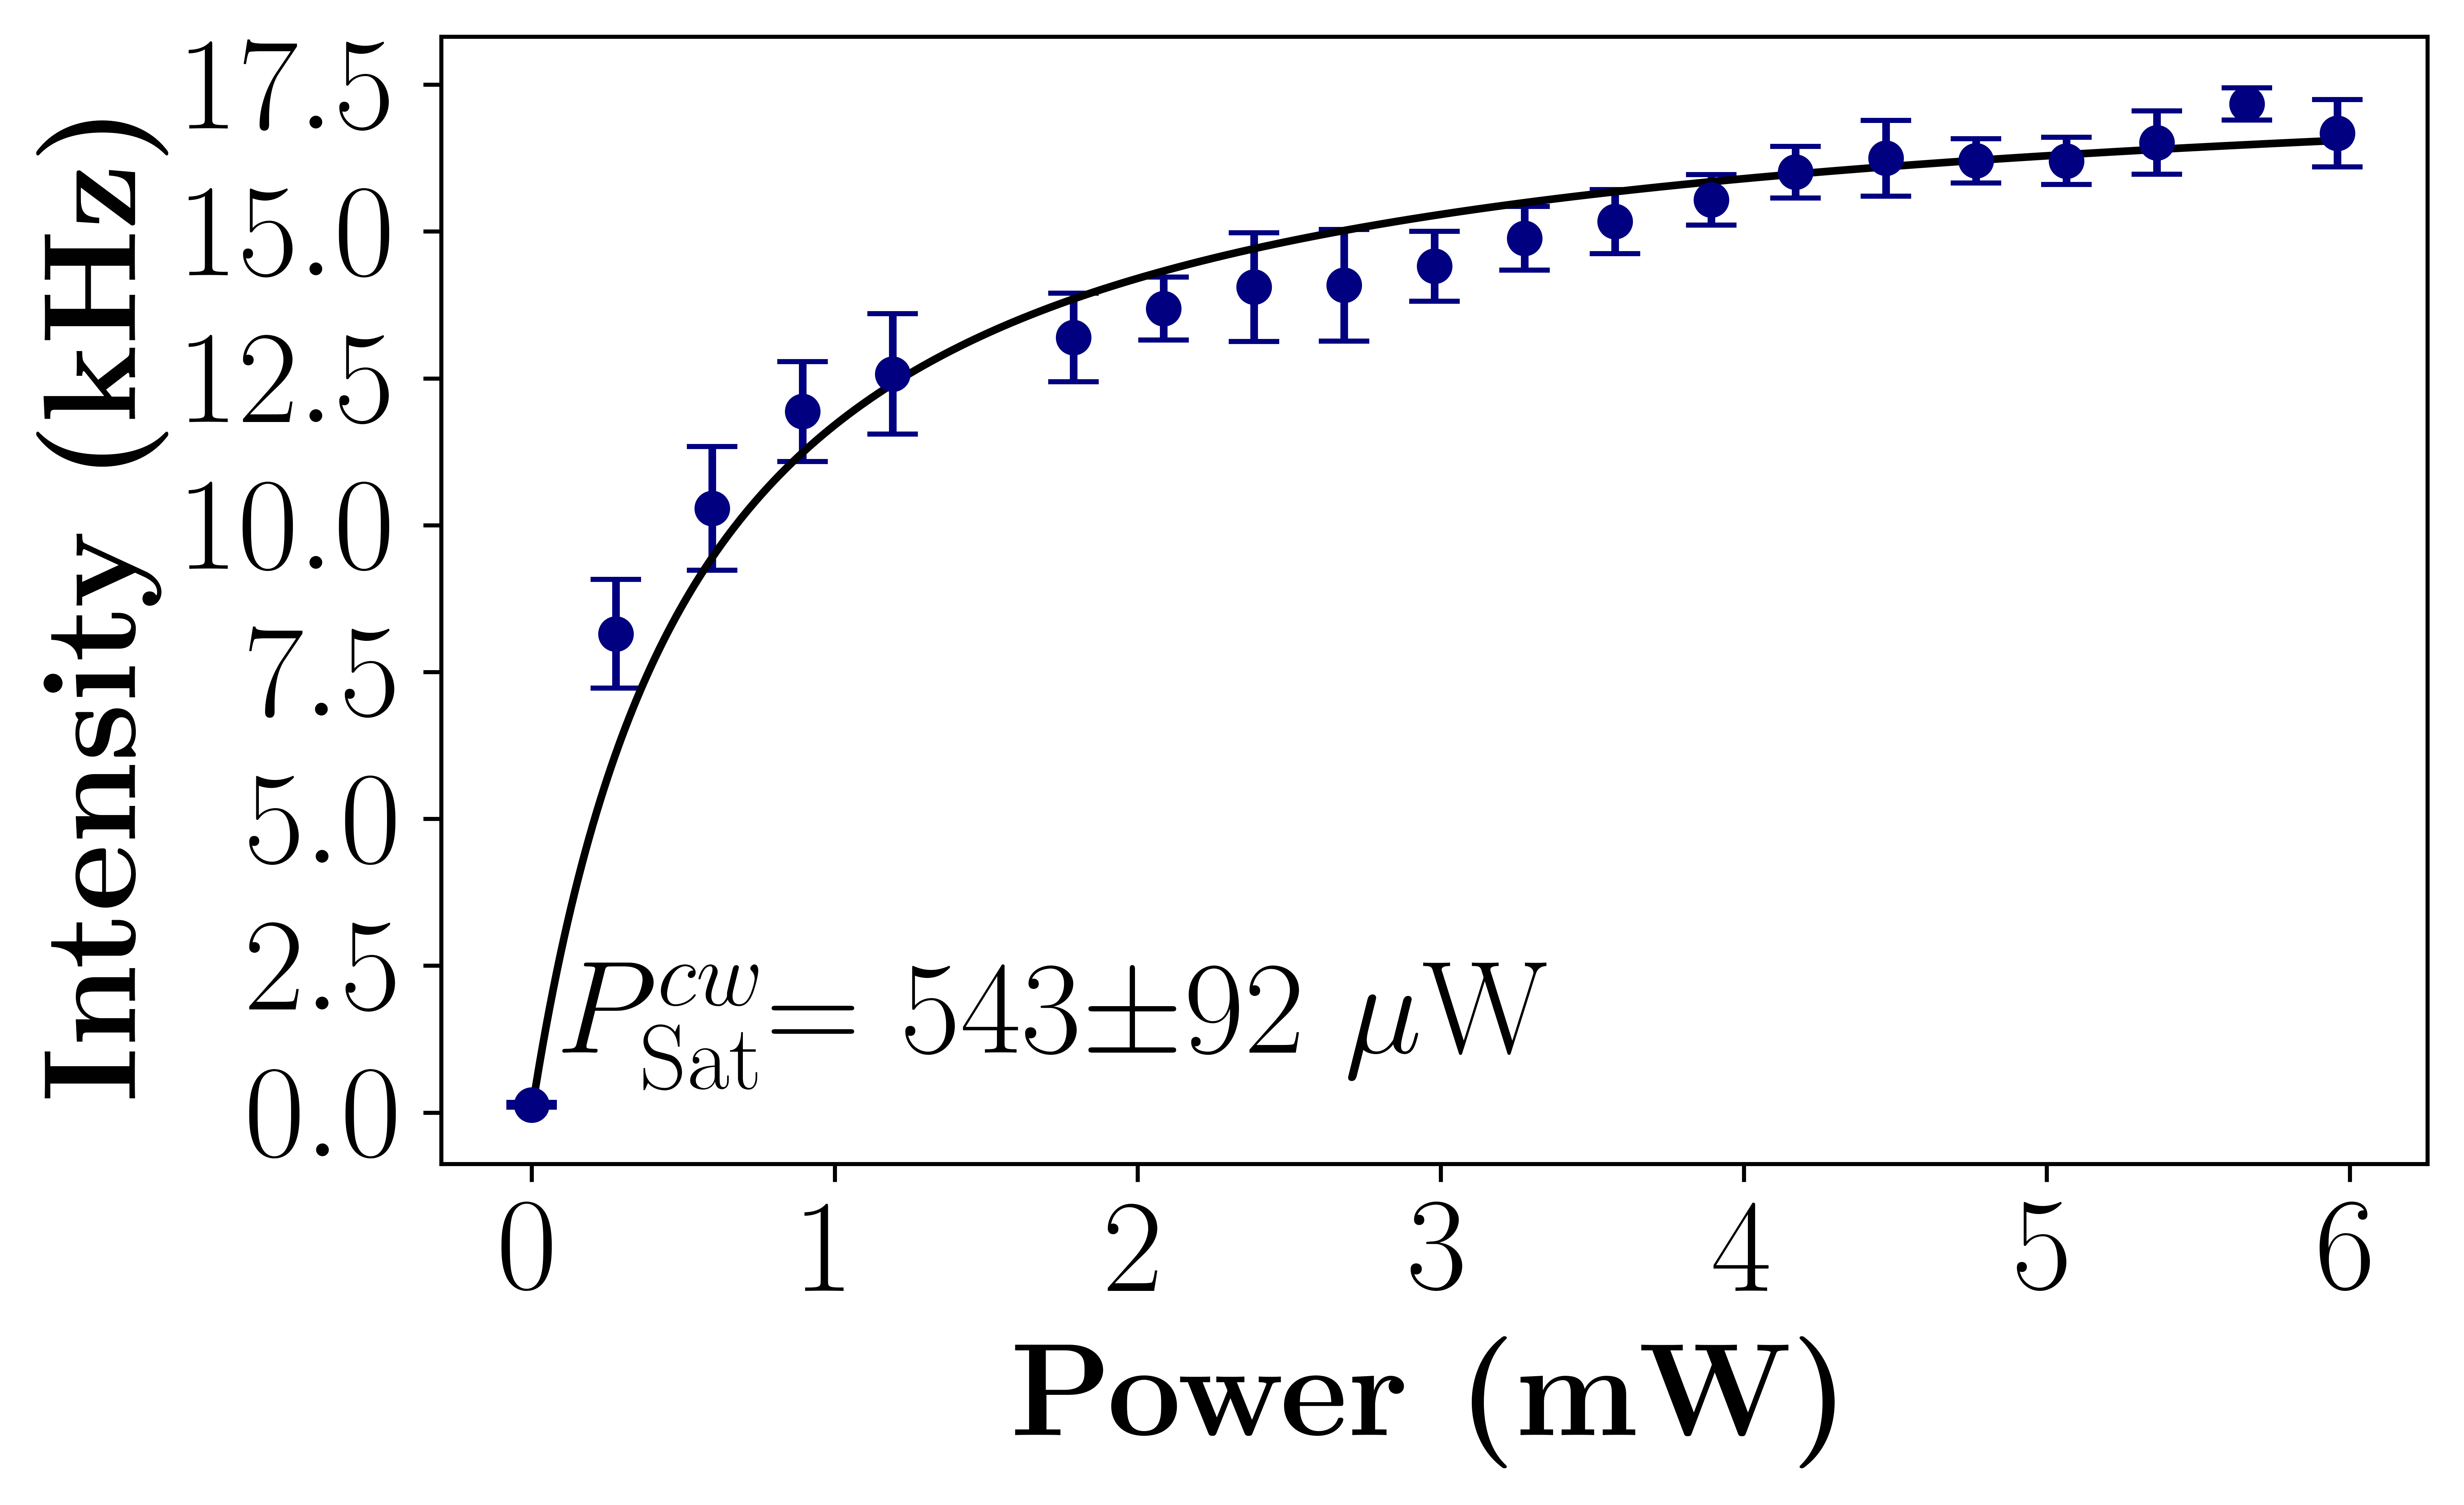

In [28]:
# Analysing data
single_powers = []
for i in range(20):
  single_powers.append(power[i])

mean_counts = []
std_counts = []
for pow in single_powers:
  counter = []
  for j, c in enumerate(counts):
    current_power = single_powers[np.abs(single_powers - power[j]).argmin()]
    if current_power == pow:
      counter.append(c)
  mean_counts.append(np.mean(counter))
  std_counts.append(np.std(counter))

# Fit
def sat_fit(P, Imax, Psat):
  return Imax / (1 + Psat / P)

popt, cov = optimize.curve_fit(sat_fit, single_powers, mean_counts, sigma=std_counts, bounds = (0, np.inf), maxfev = 10000)
int_max = popt[0]
sat_power = popt[1]
sat_power_error = np.sqrt(cov[1,1])
print(sat_power)
print(int_max)
print(np.sqrt(cov[0,0]))
print(np.sqrt(cov[1,1]))

x_val = np.linspace(min(single_powers), max(single_powers), 1000)
# Plot
plt.figure(figsize=(7,4), dpi=1000)
plt.errorbar(single_powers, np.array(mean_counts)/1000, yerr=np.array(std_counts)/1000, fmt='o', capsize=5, color=colour)
plt.text(0.1, 1, r'$P^{cw}_{\mathrm{Sat}}$' + f'= {int(sat_power*1000)}' r'$\pm$' + f'{int(sat_power_error*1000)} ' + r'$\mu$W', fontsize=font_size)
plt.plot(x_val, sat_fit(x_val, *popt)/1000, color='black')
plt.xlabel(r"\textbf{Power (mW)}", fontsize=font_size)
plt.ylabel(r"\textbf{Intensity (kHz)}", fontsize=font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.show()

# Compilation Time

In [ ]:
# Compiling all the graphs into one subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 10), dpi=1200)

font_size = 32

# Access individual axes
ax1 = axs[0, 0]
ax2 = axs[1, 0]
ax3 = axs[1, 1]
ax4 = axs[0, 1]

plt.subplots_adjust(
    left=0.05,
    bottom=0.05,
    right=0.95,
    top=0.95,
    wspace=0,  # Width space between subplots (horizontal)
    hspace=0   # Height space between subplots (vertical)
)

# Spectrum
ax1.semilogy(x_values, y_values, color=colour)
ax1.fill_between(x_values, y_values, color=shade, alpha=0.4)
ax1.axvline(x=1.7674, color='green', linestyle='--', linewidth=2, alpha=0.9)
ax1.axvline(x=1.753, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax1.axvline(x=1.738, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax1.text(1.55, 0.15, r'FWHM = 1.2 THz', fontsize=font_size)
ax1.text(1.595, 0.05, 'PSB', fontsize=font_size-4)
ax1.text(1.685, 0.5, 'Filtered \n ZPL', fontsize=font_size-4)
ax1.text(1.77, 0.5, 'Just \n LP filter', fontsize=font_size-4)
ax1.set_xlabel(r'\textbf{Energy (eV)}', fontsize=font_size)
ax1.set_ylabel(r'\textbf{Norm. intensity}', fontsize=font_size)
ax1.set_ylim(0.005, 2)
ax1.set_xlim(1.54, 1.8251)
ax1.tick_params(axis='both', labelsize=font_size)
ax1.text(1.55, 1, r'\textbf{a)}', fontsize=font_size)

# Lifetime
ax2.semilogy(final_lt_timestamp, final_lt_counts, 'o',color=shade, ms = 1,alpha=0.7, label='Data')
ax2.plot(final_lt_timestamp[round(max_index*1.1):], fit_norm, label='Fit', color = fit_colour, alpha = 1, linewidth = 2.1)
ax2.text(0.5*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$T_1$' + f'={2.54}' + r'$\pm$' +  f'{0.01} ns', fontsize=font_size)
ax2.fill_between((IRF_timestamp-0.24e-9)/1e-8, IRF_counts_norm, color="gainsboro", alpha=1)  # Alpha controls transparency
ax2.set_xlabel(r"\textbf{Time (ns)}", fontsize=font_size)
ax2.set_ylabel(r"\textbf{Counts (a.u)}", fontsize=font_size)
ax2.tick_params(axis='both', labelsize=font_size)
ax2.set_ylim(0.8*1e-2,2)
ax2.text(-0.1, 1, r'\textbf{c)}', fontsize=font_size)

# G2(0)
# ax3.plot(delay_shifted, one_exp_unnormalized(delay_shifted, *parametros_optimos_shifted) / Norm_shift, '-k')
# ax3.plot(delay_shifted, correlations / Norm_shift, 'o', c=colour, ms=2)
# ax3.text(-30000, 1.4, r'$g^{(2)}(0)$ = ' + f'{round(g2_0_shift,2)} ± {round(Delta_g2_0_shift,2)}', fontsize=font_size)
# ax3.set_xlabel(r'\textbf{Delay (ns)}', fontsize=font_size)
# ax3.set_ylabel(r'\textbf{Norm. Coincidences}', fontsize=font_size)
# ax3.set_ylim(0, 1.6)
# ax3.set_xlim(-50000, 50000)
# ax3.tick_params(axis='both', labelsize=font_size)
# xticks = ax3.get_xticks()
# ax3.set_xticks(xticks)
# ax3.set_xticklabels([str(int(x / 1000)) for x in xticks])  # Convert from ns to µs
# ax3.text(-55000, 1.4, r'\textbf{d)}', fontsize=font_size)
# Dibuja línea horizontal en 1
ax3.axhline(1, linestyle='--', c="grey", alpha=0.8)
ax3.plot(delays, correlations / 111, '-', c=colour, ms=2)
ax3.fill_between(delays, correlations / 111, color=shade, alpha=0.4)
ax3.text(-25000, 4.35, r'$g^{(2)}(0)$ = ' + f'{0.11} ± {0.01}', fontsize=font_size)
ax3.set_xlabel(r'\textbf{Delay (ns)}', fontsize=font_size)
ax3.set_ylabel(r'\textbf{Coincidences}' + '\n' + r'\textbf{(norm.)}', fontsize=font_size)
ax3.set_ylim(0, 5)
ax3.set_xlim(-71000, 71000)
ax3.tick_params(axis='both', labelsize=font_size)
xticks = ax3.get_xticks()
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(int(x / 1000)) for x in xticks])  # ns → µs
ax3.text(-90000, 4.35, r'\textbf{d)}', fontsize=font_size)

# Sat Curve
ax4.errorbar(single_powers, np.array(mean_counts) / 1000, yerr=np.array(std_counts) / 1000,
             fmt='o', capsize=5, color='maroon')
ax4.plot(x_val, sat_fit(x_val+1e-20, *popt) / 1000, color='black')
ax4.text(2, 5, r'$P_{\mathrm{Sat}}$ = ' + f'{round(sat_power, 2)} ± {round(sat_power_error, 2)} mW', fontsize=font_size)
ax4.set_xlabel(r'\textbf{Power (mW)', fontsize=font_size)
ax4.set_ylabel(r'\textbf{Intensity (kHz)}', fontsize=font_size)
ax4.tick_params(axis='both', labelsize=font_size)
ax4.text(0, 15.8, r'\textbf{b)}', fontsize=font_size)

# Final layout
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Compiling all the graphs into one subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 13), dpi=1000)

font_size = 32

# Access individual axes
ax1 = axs[0]
ax2 = axs[2]
ax4 = axs[1]

plt.subplots_adjust(
    left=0.05,
    bottom=0.05,
    right=0.95,
    top=0.95,
    wspace=0,  # Width space between subplots (horizontal)
    hspace=0   # Height space between subplots (vertical)
)

color = 'navy'

# Spectrum
ax1.semilogy(x_values, y_values, color=colour)
ax1.fill_between(x_values, y_values, color=shade, alpha=0.4)
ax1.axvline(x=1.7674, color='teal', linestyle='--', linewidth=2, alpha=0.9)
ax1.axvline(x=1.753, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax1.axvline(x=1.738, color='black', linestyle='--', linewidth=2, alpha=0.6)
#ax1.text(1.58, 0.11, r'$\Gamma$ = 1.2 THz', fontsize=font_size)
ax1.text(1.69, 0.15, 'Filtered \n ZPL', fontsize=font_size-5)
ax1.text(1.770, 0.2, 'LP filter', fontsize=font_size-5)
ax1.arrow(1.73, max(y_values)/2, 0.0135, 0, width = 0.02,length_includes_head=True,
          head_width=0.15, head_length=0.008, color='red')
ax1.arrow(1.764, max(y_values)/2, -0.014, 0, width = 0.02, length_includes_head=True,
          head_width=0.15, head_length=0.008, color='red')
ax1.set_xlabel(r'\textbf{Energy (eV)}', fontsize=font_size, labelpad=6)
ax1.set_ylabel(r'\textbf{Norm. intensity}', fontsize=font_size)
ax1.set_ylim(0.005, 2)
ax1.set_xlim(1.54, 1.8251)
ax1.tick_params(axis='both', labelsize=font_size)
ax1.text(1.55, 1, r'\textbf{a)}', fontsize=font_size)

# Lifetime
lt_val = 1/(2*np.pi*2.54*1e-9)/1e6
lt_error = 0.04*1e-9/(2*np.pi*(2.54*1e-9)**2)/1e6
ax2.semilogy(final_lt_timestamp, final_lt_counts, 'o',color='navy', ms = 1,alpha=0.7, label='Data')
ax2.plot(final_lt_timestamp[round(max_index*1.1):], fit_norm, label='Fit', color = fit_colour, alpha = 1, linewidth = 2.1)
#ax2.text(0.5*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$\gamma$' + f'={np.round(lt_val,1)}' + r'$\pm$' +  f'{np.round(lt_error, 1)} MHz', fontsize=font_size)
ax2.text(0.5*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$T_1 = 2.54 \pm 0.04$ ns', fontsize=font_size)
ax2.fill_between((IRF_timestamp-0.24e-9)/1e-9, IRF_counts_norm, color="gainsboro", alpha=1)  # Alpha controls transparency
ax2.set_xlabel(r"\textbf{Time (ns)}", fontsize=font_size)
ax2.set_ylabel(r"\textbf{Norm. counts}", fontsize=font_size)
ax2.tick_params(axis='both', labelsize=font_size)
ax2.set_ylim(0.8*1e-2,2)
ax2.text(-0.1, 1, r'\textbf{c)}', fontsize=font_size)

# Sat Curve
ax4.errorbar(single_powers, np.array(mean_counts) / 1000, yerr=np.array(std_counts) / 1000,
             fmt='o', color='navy', capsize=7, alpha=1, elinewidth= 3, capthick=2)
ax4.plot(x_val, sat_fit(x_val+1e-20, *popt) / 1000, color='black')
ax4.text(2, 5, r'$P^{cw}_{\mathrm{Sat}}$ = ' + f'{round(sat_power, 2)} ± {round(sat_power_error, 2)} mW', fontsize=font_size)
ax4.set_xlabel(r'\textbf{Power (mW)', fontsize=font_size, labelpad=6)
ax4.set_ylabel(r'\textbf{Intensity (kHz)}', fontsize=font_size)
ax4.tick_params(axis='both', labelsize=font_size)
ax4.text(0, 15.8, r'\textbf{b)}', fontsize=font_size)

# Final layout
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Intento ajustar la figura a lo establecido por ACS Photonics**

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "helvetica",
    "font.serif": ["helvetica"]
})

In [ ]:
import pickle
# Spectrum
uploaded = files.upload()
data_file_path_spectrum_analysed = list(uploaded.keys())[0]
print(data_file_path_spectrum_analysed)

Saving f3-710-26.03.2025-10.39-B-StepAndGlue5.3mW10sExpTime_analyzed_for_DWF_16_11_28_07_2025.pkl to f3-710-26.03.2025-10.39-B-StepAndGlue5.3mW10sExpTime_analyzed_for_DWF_16_11_28_07_2025.pkl
f3-710-26.03.2025-10.39-B-StepAndGlue5.3mW10sExpTime_analyzed_for_DWF_16_11_28_07_2025.pkl


In [ ]:
# We load the file
with open(data_file_path_spectrum_analysed, "rb") as archivo:
    loaded_data = pickle.load(archivo)

spectrum_analized = loaded_data["Analysed_spectrum"]

counts_ROI = loaded_data["Counts"]
detuning_ROI = loaded_data["Detunings"]
ZPL_nm = loaded_data["ZPL_nm"]
DWF = loaded_data["Debye_Waller_Factor"]
DWF_error = loaded_data["Debye_Waller_Factor_error"]
fit_params = loaded_data["Fit_Parameters"]

x0 = loaded_data["ZPL_peak"]
x1 = loaded_data["LO1_peak"]
x2 = loaded_data["LE1_peak"]
x3 = loaded_data["LE2_peak"]
x4 = loaded_data["LE2_absortion_peak"]
x5 = loaded_data["LE1_absortion_peak"]
x6 = loaded_data["LO2_peak"]

FWHM0 = loaded_data["ZPL_FWHM"]
FWHM1 = loaded_data["LO1_FWHM"]
FWHM2 = loaded_data["LE1_FWHM"]
FWHM3 = loaded_data["LE2_FWHM"]
FWHM4 = loaded_data["LE2_absortion_FWHM"]
FWHM5 = loaded_data["LE1_absortion_FWHM"]
FWHM6 = loaded_data["LO2_FWHM"]

A0 = loaded_data["ZPL_amplitude"]
A1 = loaded_data["LO1_amplitude"]
A2 = loaded_data["LE1_amplitude"]
A3 = loaded_data["LE2_amplitude"]
A4 = loaded_data["LE2_absortion_amplitude"]
A5 = loaded_data["LE1_absortion_amplitude"]
A6 = loaded_data["LO2_amplitude"]

# Fitting function with a straight line with certain slope for background
def lorentzian(x, A, x0, FWHM): # Lorentzian curve with a curve with gradient for background
    return A * FWHM / (2 * np.pi * ((x-x0)**2 + (FWHM/2)**2))

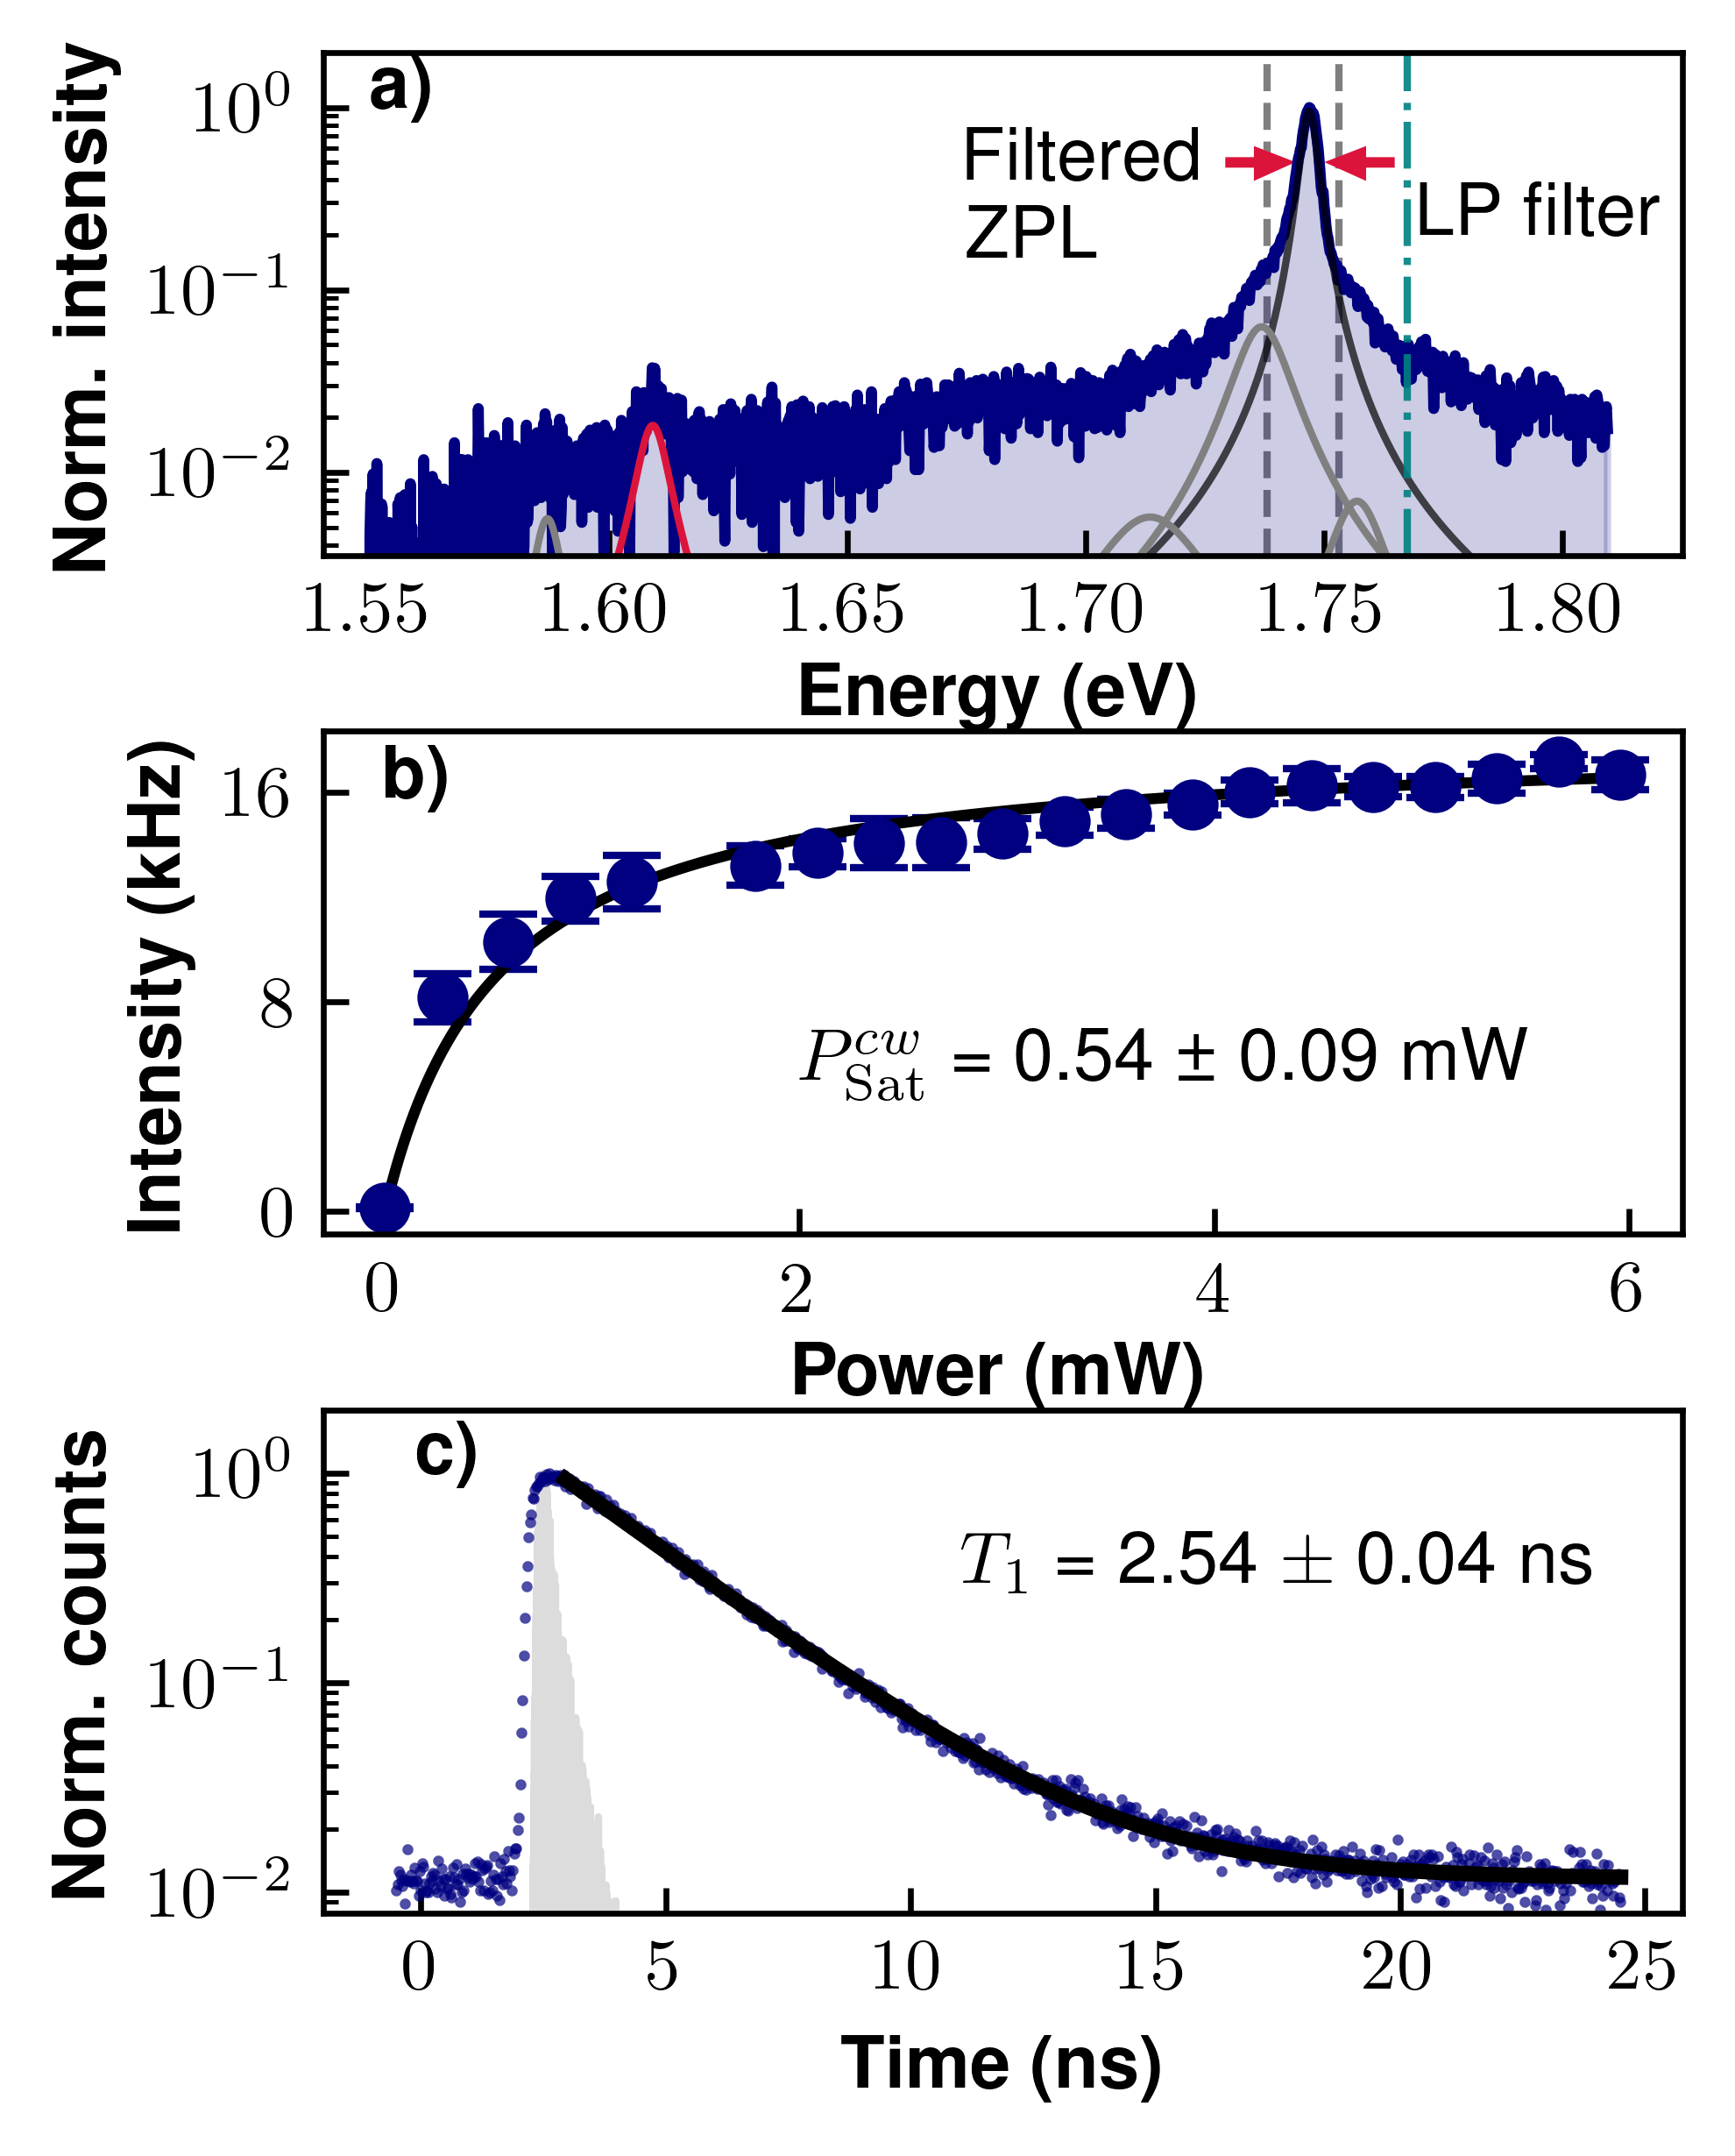

In [ ]:
from matplotlib.ticker import MaxNLocator

# Compiling all the graphs into one subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(3.1, 3.9), dpi=600)

font_size = 10

# Access individual axes
ax1 = axs[0]
ax2 = axs[2]
ax4 = axs[1]

plt.subplots_adjust(
    left=0.05,
    bottom=0.05,
    right=0.95,
    top=0.95,
    wspace=0,  # Width space between subplots (horizontal)
    hspace=0   # Height space between subplots (vertical)
)

color = 'navy'

# Spectrum
ax1.axvline(x=1.753, color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
ax1.axvline(x=1.738, color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
ax1.semilogy(x_values, y_values, color=colour)

ax1.plot(x_values, lorentzian(x_values, A0/1000, x0/1000+1239.8/ZPL_nm, FWHM0/1000)/max(counts_ROI), color='black', linestyle='-', linewidth=1, alpha=0.7)
ax1.plot(x_values, lorentzian(x_values, A1/1000, x1/1000+1239.8/ZPL_nm, FWHM1/1000)/max(counts_ROI), color='crimson', linestyle='-', linewidth=1, alpha=1)
ax1.plot(x_values, lorentzian(x_values, A2/1000, x2/1000+1239.8/ZPL_nm, FWHM2/1000)/max(counts_ROI), color='crimson', linestyle='-', linewidth=1, alpha=1)
ax1.plot(x_values, lorentzian(x_values, A3/1000, x3/1000+1239.8/ZPL_nm, FWHM3/1000)/max(counts_ROI), color='crimson', linestyle='-', linewidth=1, alpha=1)
ax1.plot(x_values, lorentzian(x_values, A4/1000, x4/1000+1239.8/ZPL_nm, FWHM4/1000)/max(counts_ROI), color='crimson', linestyle='-', linewidth=1, alpha=1)
ax1.plot(x_values, lorentzian(x_values, A5/1000, x5/1000+1239.8/ZPL_nm, FWHM5/1000)/max(counts_ROI), color='crimson', linestyle='-', linewidth=1, alpha=1)
ax1.plot(x_values, lorentzian(x_values, A6/1000, x6/1000+1239.8/ZPL_nm, FWHM6/1000)/max(counts_ROI), color='crimson', linestyle='-', linewidth=1, alpha=1)


ax1.fill_between(x_values, y_values, color=shade, alpha=0.2)
ax1.axvline(x=1.7674, color='teal', linestyle='-.', linewidth=1, alpha=0.9)

#ax1.text(1.58, 0.11, r'$\Gamma$ = 1.2 THz', fontsize=font_size)
ax1.text(1.675, 0.15, 'Filtered \n ZPL', fontsize=font_size)
ax1.text(1.770, 0.2, 'LP filter', fontsize=font_size)
ax1.arrow(1.73, max(y_values)/2, 0.012, 0, width = 0.02,length_includes_head=True,
          head_width=0.15, head_length=0.006, color='crimson')
ax1.arrow(1.764, max(y_values)/2, -0.012, 0, width = 0.02, length_includes_head=True,
          head_width=0.15, head_length=0.006, color='crimson')
ax1.set_xlabel(r'\textbf{Energy (eV)}', fontsize=font_size, labelpad=2)
ax1.set_ylabel(r'\textbf{Norm. intensity}', fontsize=font_size)
ax1.set_ylim(0.0035, 2)
ax1.set_xlim(1.54, 1.8251)
ax1.tick_params(axis='both', labelsize=font_size, direction = 'in')
ax1.tick_params(which='minor', direction = 'in')
ax1.text(1.55, 1, r'\textbf{a)}', fontsize=font_size)

# Lifetime
lt_val = 1/(2*np.pi*2.54*1e-9)/1e6
lt_error = 0.04*1e-9/(2*np.pi*(2.54*1e-9)**2)/1e6
ax2.semilogy(final_lt_timestamp, final_lt_counts, 'o',color='navy', ms = 0.5,alpha=0.7, label='Data')
ax2.plot(final_lt_timestamp[round(max_index*1.1):], fit_norm, label='Fit', color = fit_colour, alpha = 1, linewidth = 2.1)
#ax2.text(0.5*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$\gamma$' + f'={np.round(lt_val,1)}' + r'$\pm$' +  f'{np.round(lt_error, 1)} MHz', fontsize=font_size)
ax2.text(0.45*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$T_1$ = 2.54 $\pm$ 0.04 ns', fontsize=font_size)
ax2.fill_between((IRF_timestamp-0.24e-9)/1e-9, IRF_counts_norm, color="gainsboro", alpha=1)  # Alpha controls transparency
ax2.set_xlabel(r"\textbf{Time (ns)}", fontsize=font_size)
ax2.set_ylabel(r"\textbf{Norm. counts}", fontsize=font_size)
ax2.tick_params(axis='both', labelsize=font_size, direction = 'in')
ax2.tick_params(which='minor', direction = 'in')
ax2.set_ylim(0.8*1e-2,2)
ax2.text(-0.1, 1, r'\textbf{c)}', fontsize=font_size)

# Sat Curve
ax4.errorbar(single_powers, np.array(mean_counts) / 1000, yerr=np.array(std_counts) / 1000,
             fmt='o', color='navy', capsize=4, alpha=1, elinewidth= 1.5, capthick=1)
ax4.plot(x_val, sat_fit(x_val+1e-20, *popt) / 1000, color='black')
ax4.text(2, 5, r'$P^{cw}_{\mathrm{Sat}}$ = ' + f'{round(sat_power, 2)} ± {round(sat_power_error, 2)} mW', fontsize=font_size)
ax4.set_xlabel(r'\textbf{Power (mW)}', fontsize=font_size, labelpad=2)
ax4.set_ylabel(r'\textbf{Intensity (kHz)}', fontsize=font_size)
ax4.tick_params(axis='both', labelsize=font_size, direction = 'in')

ax4.text(0, 15.8, r'\textbf{b)}', fontsize=font_size)
ax4.yaxis.set_major_locator(MaxNLocator(nbins=3))

# Final layout
plt.tight_layout(pad=0)

save_figure = False
if save_figure:
      plt.savefig("Figure1PDF.pdf", format="pdf", bbox_inches='tight')
      files.download("Figure1PDF.pdf")
plt.show()

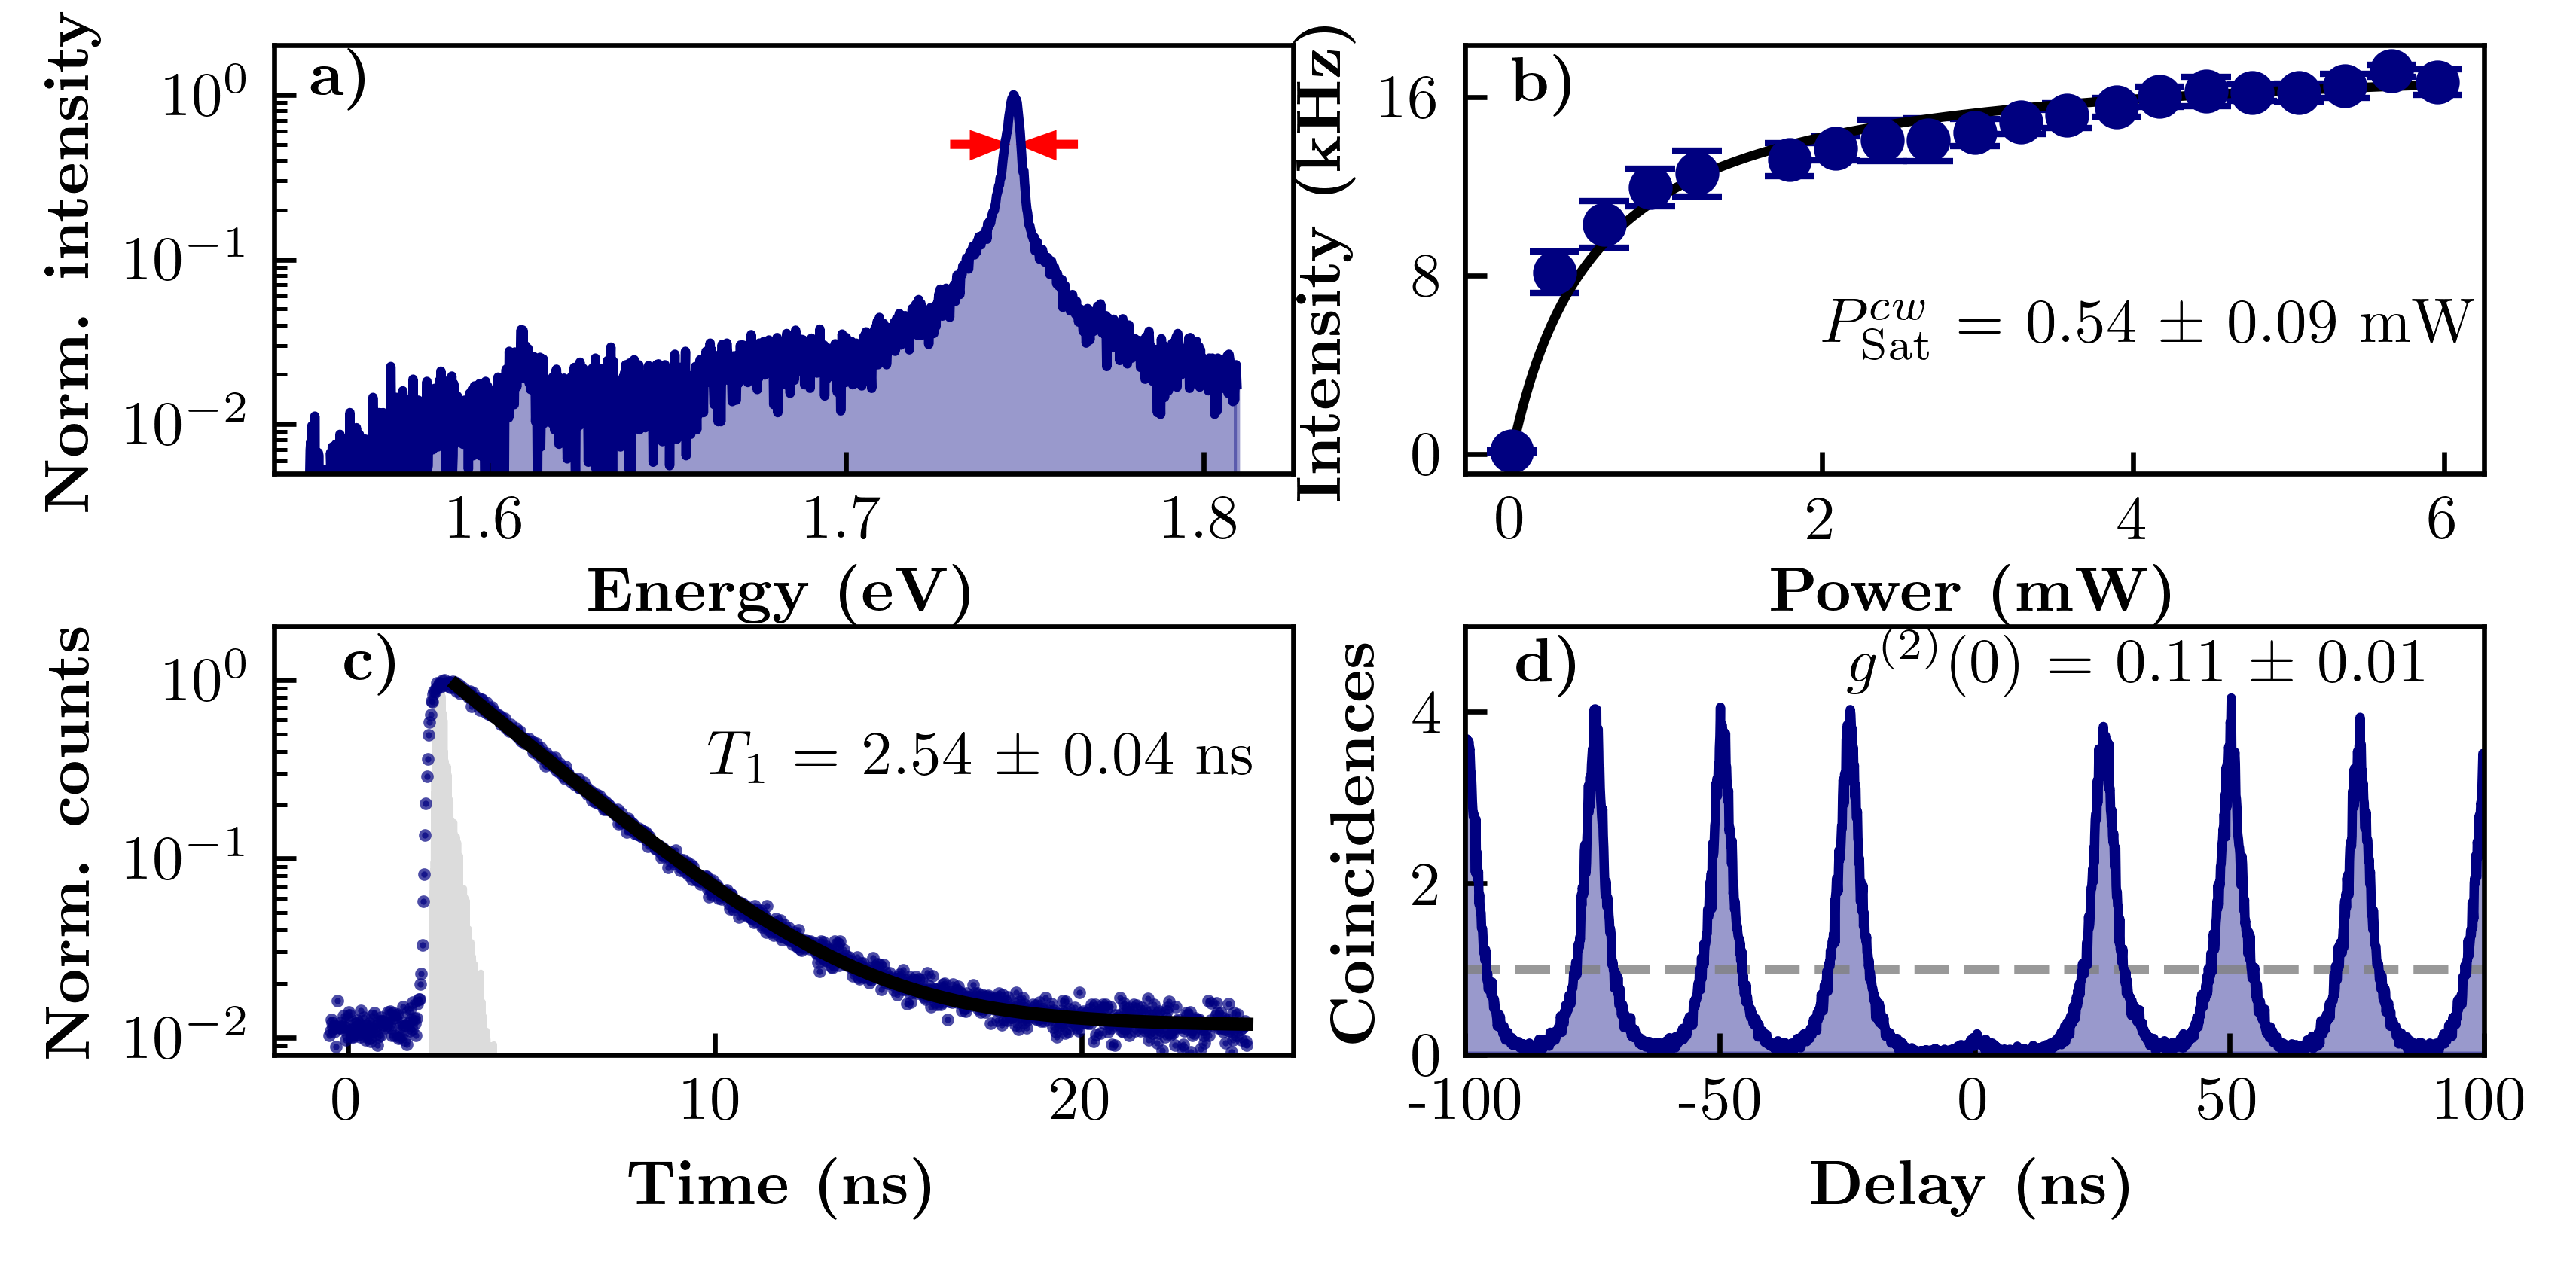

In [30]:
from matplotlib.ticker import MaxNLocator

# Compiling all the graphs into one subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5.5, 2.6), dpi=600)

font_size = 10

# Access individual axes
ax1 = axs[0, 0]
ax2 = axs[1, 0]
ax3 = axs[1, 1]
ax4 = axs[0, 1]
plt.subplots_adjust(
    left=0.05,
    bottom=0.05,
    right=0.95,
    top=0.95,
    wspace=0,  # Width space between subplots (horizontal)
    hspace=0   # Height space between subplots (vertical)
)

color = 'navy'

# Spectrum
ax1.semilogy(x_values, y_values, color=colour)
ax1.fill_between(x_values, y_values, color=shade, alpha=0.4)
# ax1.axvline(x=1.7674, color='teal', linestyle='dotted', linewidth=2, alpha=0.9)
# ax1.axvline(x=1.753, color='black', linestyle='--', linewidth=2, alpha=0.6)
# ax1.axvline(x=1.738, color='black', linestyle='--', linewidth=2, alpha=0.6)
# #ax1.text(1.58, 0.11, r'$\Gamma$ = 1.2 THz', fontsize=font_size)
# ax1.text(1.670, 0.15, 'Filtered \n ZPL', fontsize=font_size)
# ax1.text(1.770, 0.2, 'LP filter', fontsize=font_size-2)
ax1.arrow(1.73, max(y_values)/2, 0.0135, 0, width = 0.02,length_includes_head=True,
          head_width=0.15, head_length=0.008, color='red')
ax1.arrow(1.764, max(y_values)/2, -0.014, 0, width = 0.02, length_includes_head=True,
          head_width=0.15, head_length=0.008, color='red')
ax1.set_xlabel(r'\textbf{Energy (eV)}', fontsize=font_size, labelpad=2)
ax1.set_ylabel(r'\textbf{Norm. intensity}', fontsize=font_size)
ax1.set_ylim(0.005, 2)
ax1.set_xlim(1.54, 1.8251)
ax1.tick_params(axis='both', labelsize=font_size, direction = 'in')
ax1.tick_params(which='minor', direction = 'in')
ax1.text(1.55, 1, r'\textbf{a)}', fontsize=font_size)

# Lifetime
lt_val = 1/(2*np.pi*2.54*1e-9)/1e6
lt_error = 0.04*1e-9/(2*np.pi*(2.54*1e-9)**2)/1e6
ax2.semilogy(final_lt_timestamp, final_lt_counts, 'o',color='navy', ms = 1,alpha=0.7, label='Data')
ax2.plot(final_lt_timestamp[round(max_index*1.1):], fit_norm, label='Fit', color = fit_colour, alpha = 1, linewidth = 2.1)
#ax2.text(0.5*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$\gamma$' + f'={np.round(lt_val,1)}' + r'$\pm$' +  f'{np.round(lt_error, 1)} MHz', fontsize=font_size)
ax2.text(0.40*max(final_lt_timestamp), 0.3*max(final_lt_counts), r'$T_1$ = 2.54 $\pm$ 0.04 ns', fontsize=font_size)
ax2.fill_between((IRF_timestamp-0.24e-9)/1e-9, IRF_counts_norm, color="gainsboro", alpha=1)  # Alpha controls transparency
ax2.set_xlabel(r"\textbf{Time (ns)}", fontsize=font_size)
ax2.set_ylabel(r"\textbf{Norm. counts}", fontsize=font_size)
ax2.tick_params(axis='both', labelsize=font_size, direction = 'in')
ax2.tick_params(which='minor', direction = 'in')
ax2.set_ylim(0.8*1e-2,2)
ax2.text(-0.1, 1, r'\textbf{c)}', fontsize=font_size)

#G2
ax3.axhline(1, linestyle='--', c="grey", alpha=0.8)
ax3.plot(delays, correlations / 111, '-', c=colour, ms=2)
ax3.fill_between(delays, correlations / 111, color=shade, alpha=0.4)
ax3.text(-25000, 4.35, r'$g^{(2)}(0)$ = ' + f'{0.11} ± {0.01}', fontsize=font_size)
ax3.set_xlabel(r'\textbf{Delay (ns)}', fontsize=font_size)
ax3.set_ylabel(r'\textbf{Coincidences}', fontsize=font_size)
ax3.set_ylim(0, 5)
ax3.set_xlim(-71000, 71000)
ax3.tick_params(axis='both', labelsize=font_size, direction = 'in')
xticks = ax3.get_xticks()
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(int(x / 1000)) for x in xticks])  # ns → µs
ax3.text(-90000, 4.35, r'\textbf{d)}', fontsize=font_size)

# Sat Curve
ax4.errorbar(single_powers, np.array(mean_counts) / 1000, yerr=np.array(std_counts) / 1000,
             fmt='o', color='navy', capsize=4, alpha=1, elinewidth= 1.5, capthick=1)
ax4.plot(x_val, sat_fit(x_val+1e-20, *popt) / 1000, color='black')
ax4.text(2, 5, r'$P^{cw}_{\mathrm{Sat}}$ = ' + f'{round(sat_power, 2)} ± {round(sat_power_error, 2)} mW', fontsize=font_size)
ax4.set_xlabel(r'\textbf{Power (mW)', fontsize=font_size, labelpad=2)
ax4.set_ylabel(r'\textbf{Intensity (kHz)}', fontsize=font_size)
ax4.tick_params(axis='both', labelsize=font_size, direction = 'in')

ax4.text(0, 15.8, r'\textbf{b)}', fontsize=font_size)
ax4.yaxis.set_major_locator(MaxNLocator(nbins=3))

# Final layout
plt.tight_layout(pad=0)
# plt.savefig("Figure1PDF.pdf", format="pdf", bbox_inches='tight')
# files.download("Figure1PDF.pdf")
plt.show()